# Inteligencia de Negocios - 202410
# Laboratorio 2 - Regresión Lineal

### Daniel Villar - 201923374
### Sebastián Guerrero - 202021249
### Álvaro Bacca - 202121869

# 0. Importaciones

In [ ]:
#Librearias para preprocesamiento
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Libreiras para linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

#Librerias para evaluar el modelo
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, classification_report

#Libererioas para pipeline
from sklearn.pipeline import Pipeline
from joblib import dump
from joblib import load
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# Librerías para gráficas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats

# Librerías ad hoc
from copy import deepcopy


#Importar datos para entrenamiento
data = pd.read_csv('./202410_Laboratorio 2 - Regresión_train_data.csv')

# 1. Entendimiento de los datos

En esta sección se entenderán los datos que se tienen, sus características y su variable objetivo de acuerdo a los requerimientos de la Organización Mundial de la Salud. Cabe resaltar que en esta sección se ejecutarán algunas acciones y no en la sección de preparación de datos, ya que para entender los datos debemos hacer algunas pequeñas transformaciones. Sin embargo, las transformaciones grandes sí se ejecutan en la sección de preparación de los datos.

In [ ]:
print(data.shape)


(2132, 34)


Inicialmente eliminaremos los datos duplicados para que no dañen el entendimiento de los datos.

In [ ]:
data = data.drop_duplicates()

Volvemos a imprimir el tamaño de los datos para ver cuántos había:

In [ ]:
print(data.shape)

(2132, 34)


Como se puede notar, no había datos duplicados. Después de habernos asegurado de no tener datos duplicados, continuamos con el entendimiento.

Como se puede notar, tenemos 2132 datos con 34 características. A continuación visualizaremos con más detalle los datos para entenderlos y prepararlos.

In [ ]:
data.head(10)

avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0         37.0                13          521.9      36836        4201   
1        107.0                37          412.7      48683       20455   
2         22.0                12          472.9      60946        3294   
3         20.0                10          527.2      29477        2302   
4         56.0                19          446.4      38478       11310   
5         30.0                16          376.6      41469        5996   
6        187.0                80          521.2      40766       28487   
7       1403.0               577          400.2      51222      359715   
8        486.0               187          501.8      32150       91332   
9       8895.0              2817          528.0      85886     1501587   

   povertyPercent  studyPerCap           binnedInc  MedianAge  MedianAgeMale  \
0            18.3     0.000000  (34218.1, 37413.8]       47.5           44.9   
1            11.7     0.000000  (48021.6, 51046.4]       43.1           42.4   
2             7.4     0.000000  (54545.6, 61494.5]       43.6           43.4   
3            29.5     0.000000    [22640, 34218.1]       49.2           46.8   
4            23.6     0.000000  (37413.8, 40362.7]       37.5           37.4   
5            17.8     0.000000  (40362.7, 42724.4]       41.5           40.2   
6            20.6     0.000000  (40362.7, 42724.4]       43.1           41.6   
7            16.8   102.859208  (51046.4, 54545.6]       34.9           33.8   
8            31.7   306.573819    [22640, 34218.1]       34.2           32.6   
9             7.7   181.807648   (61494.5, 125635]       40.6           39.1   

   ...  PctEmpPrivCoverage PctPublicCoverage  PctPublicCoverageAlone  \
0  ...                30.2              43.2                    20.0   
1  ...                44.4              35.7                    17.8   
2  ...                48.6              24.5                     5.7   
3  ...                24.7              53.6                    27.8   
4  ...                29.8              35.5                    20.6   
5  ...                32.4              36.2                    21.0   
6  ...                42.5              38.5                    20.9   
7  ...                39.4              33.7                    21.6   
8  ...                30.6              41.3                    26.8   
9  ...                55.7              26.2                    12.0   

    PctWhite   PctBlack  PctAsian  PctOtherRace  PctMarriedHouseholds  \
0  88.570752   0.118315  1.135826      0.141978             47.157360   
1  97.797657   0.486169  0.116680      0.486169             53.723161   
2  95.560385   0.124185  0.000000      2.390562             55.846042   
3  49.613070  49.226139  0.386930      0.000000             38.522167   
4  88.516367   0.079197  0.167195      4.593453             52.379740   
5  79.973822   1.963351  0.687173      1.767016             55.701935   
6  93.538472   1.519113  0.374479      0.162510             52.138829   
7  86.790036   4.050162  1.817872      5.004829             44.799842   
8  28.881149  67.738720  0.714822      0.905584             32.243689   
9  80.948638   7.662320  3.781605      4.950535             57.618624   

   BirthRate  deathRate  
0  10.704225      169.4  
1   6.550868      131.8  
2   9.935897      209.3  
3   8.616188      250.0  
4   9.079392      152.5  
5   5.319969      192.4  
6   2.198163      220.2  
7   5.753454      163.6  
8   6.218731      194.2  
9   4.419519      163.8  

[10 rows x 34 columns]

In [ ]:
print(data.columns)

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'Geography', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'deathRate'],
      dtype='object')


Teniendo en cuenta que se quiere crear un modelo predictivo para empezar interviniendo poblaciones que, dadas sus características, tengan un alto número de muertes por cáncer, la variable objetivo es 'deathRate'.

A continuación se muestran las descripciones de todos los atributos.

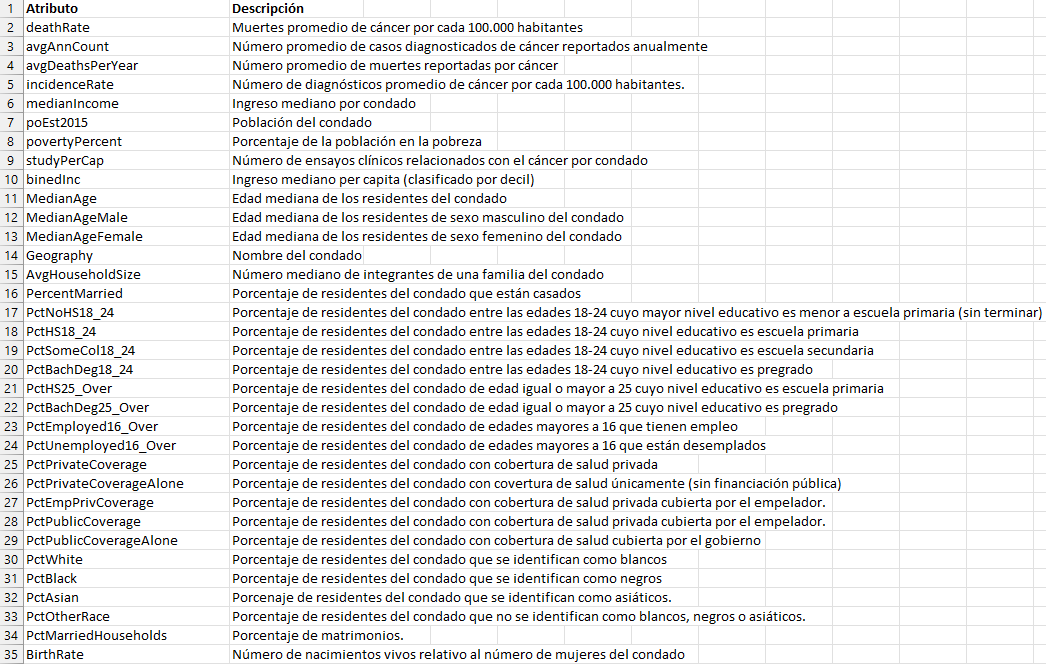

A continuación podemos ver el tipo de cada variable:

In [ ]:
data.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

Como se puede notar, la variable binnedInc y Geography son Objects. Esto indica que se deben transformar de alguna forma para hacer el entrenamiento de los datos. Sin embargo, la variable Geography presenta un dato distinto para cada fila, ya que actúa como identificador. Es por esto que se decide eliminar de los datos de entrenamiento. Una vez se tenga el modelo final, se reutilizará para la presentación al cliente. La variable binnedInc presenta 10 posibles valores, por lo que procedemos a convertir esta variable a variable numérica a través del mecanismo de reemplazar el rango de valores por el promedio entre esos dos valores. Se procede a hacer esto en esta sección para entender los datos de manera más precisa y poder corregir outliers en la preparación de los datos.

In [ ]:
def calcular_promedio(rango):
    limite_inferior, limite_superior = map(float, rango.strip('()[]').split(','))
    return (limite_inferior + limite_superior) / 2

data['binnedInc'] = data['binnedInc'].apply(calcular_promedio)


In [ ]:
dtypes_df = pd.DataFrame(data.dtypes, columns=['dtype'])
dtypes_df.reset_index(inplace=True)
dtypes_df.columns = ['columna', 'dtype']
dtypes_df

columna    dtype
0               avgAnnCount  float64
1          avgDeathsPerYear    int64
2             incidenceRate  float64
3                 medIncome    int64
4                popEst2015    int64
5            povertyPercent  float64
6               studyPerCap  float64
7                 binnedInc  float64
8                 MedianAge  float64
9             MedianAgeMale  float64
10          MedianAgeFemale  float64
11                Geography   object
12         AvgHouseholdSize  float64
13           PercentMarried  float64
14             PctNoHS18_24  float64
15               PctHS18_24  float64
16          PctSomeCol18_24  float64
17          PctBachDeg18_24  float64
18             PctHS25_Over  float64
19        PctBachDeg25_Over  float64
20       PctEmployed16_Over  float64
21     PctUnemployed16_Over  float64
22       PctPrivateCoverage  float64
23  PctPrivateCoverageAlone  float64
24       PctEmpPrivCoverage  float64
25        PctPublicCoverage  float64
26   PctPublicCoverageAlone  float64
27                 PctWhite  float64
28                 PctBlack  float64
29                 PctAsian  float64
30             PctOtherRace  float64
31     PctMarriedHouseholds  float64
32                BirthRate  float64
33                deathRate  float64

In [ ]:
data.head(10).T

0  \
avgAnnCount                                      37.0   
avgDeathsPerYear                                   13   
incidenceRate                                   521.9   
medIncome                                       36836   
popEst2015                                       4201   
povertyPercent                                   18.3   
studyPerCap                                       0.0   
binnedInc                                    35815.95   
MedianAge                                        47.5   
MedianAgeMale                                    44.9   
MedianAgeFemale                                  49.6   
Geography                Gregory County, South Dakota   
AvgHouseholdSize                                 2.12   
PercentMarried                                   57.3   
PctNoHS18_24                                     11.6   
PctHS18_24                                       33.5   
PctSomeCol18_24                                  44.6   
PctBachDeg18_24                                  10.3   
PctHS25_Over                                     38.6   
PctBachDeg25_Over                                13.6   
PctEmployed16_Over                               59.7   
PctUnemployed16_Over                              2.1   
PctPrivateCoverage                               66.0   
PctPrivateCoverageAlone                          45.5   
PctEmpPrivCoverage                               30.2   
PctPublicCoverage                                43.2   
PctPublicCoverageAlone                           20.0   
PctWhite                                    88.570752   
PctBlack                                     0.118315   
PctAsian                                     1.135826   
PctOtherRace                                 0.141978   
PctMarriedHouseholds                         47.15736   
BirthRate                                   10.704225   
deathRate                                       169.4   

                                                1  \
avgAnnCount                                 107.0   
avgDeathsPerYear                               37   
incidenceRate                               412.7   
medIncome                                   48683   
popEst2015                                  20455   
povertyPercent                               11.7   
studyPerCap                                   0.0   
binnedInc                                 49534.0   
MedianAge                                    43.1   
MedianAgeMale                                42.4   
MedianAgeFemale                              44.0   
Geography                Taylor County, Wisconsin   
AvgHouseholdSize                             2.32   
PercentMarried                               58.7   
PctNoHS18_24                                 18.5   
PctHS18_24                                   41.1   
PctSomeCol18_24                              35.6   
PctBachDeg18_24                               4.8   
PctHS25_Over                                 46.3   
PctBachDeg25_Over                             9.3   
PctEmployed16_Over                           62.2   
PctUnemployed16_Over                          5.5   
PctPrivateCoverage                           69.4   
PctPrivateCoverageAlone                      52.8   
PctEmpPrivCoverage                           44.4   
PctPublicCoverage                            35.7   
PctPublicCoverageAlone                       17.8   
PctWhite                                97.797657   
PctBlack                                 0.486169   
PctAsian                                  0.11668   
PctOtherRace                             0.486169   
PctMarriedHouseholds                    53.723161   
BirthRate                                6.550868   
deathRate                                   131.8   

                                                   2                        3  \
avgAnnCount                                     22.0                     20.0   
avgDeathsPerYear                      

Como se puede notar, ahora todas las variables (salvo Geography) son de tipo numérico.

A continuación se presenta la información para todas las características, con el fin de identificar datos incorrectos, de reconocer los rangos de las variables, de saber si hay outliers, etc. Se transponen los datos con el fin de visualizarlos todos. Si no se transponen quedarían algunos sin visualizar.

In [ ]:
descripcion_transpuesta = data.describe().T
display(descripcion_transpuesta)

count           mean            std           min  \
avgAnnCount              2132.0     613.385785    1435.393846      6.000000   
avgDeathsPerYear         2132.0     183.537992     507.649052      3.000000   
incidenceRate            2132.0     448.816467      53.582307    201.300000   
medIncome                2132.0   47029.474203   12107.930677  22640.000000   
popEst2015               2132.0  102506.405722  344228.217798    829.000000   
povertyPercent           2132.0      16.889681       6.415614      3.200000   
studyPerCap              2132.0     158.003002     533.636824      0.000000   
binnedInc                2132.0   48736.965924   16735.124144  28429.050000   
MedianAge                2132.0      44.298687      39.522898     23.500000   
MedianAgeMale            2132.0      39.559475       5.208212     22.800000   
MedianAgeFemale          2132.0      42.140009       5.272267     22.800000   
AvgHouseholdSize         2132.0       2.479013       0.421538      0.022100   
PercentMarried           2132.0      51.756285       6.925242     23.100000   
PctNoHS18_24             2132.0      18.134897       8.091987      0.000000   
PctHS18_24               2132.0      34.981660       9.024105      0.000000   
PctSomeCol18_24           528.0      41.151705      11.046405      7.100000   
PctBachDeg18_24          2132.0       6.201173       4.628540      0.000000   
PctHS25_Over             2132.0      34.949578       7.056699      7.500000   
PctBachDeg25_Over        2132.0      13.225797       5.395211      2.500000   
PctEmployed16_Over       2017.0      54.119137       8.398898     17.600000   
PctUnemployed16_Over     2132.0       7.843574       3.448596      0.700000   
PctPrivateCoverage       2132.0      64.393011      10.670887     22.300000   
PctPrivateCoverageAlone  1704.0      48.407688       9.985504     15.700000   
PctEmpPrivCoverage       2132.0      41.237899       9.326155     13.500000   
PctPublicCoverage        2132.0      36.305113       7.847326     11.200000   
PctPublicCoverageAlone   2132.0      19.282786       6.136426      2.600000   
PctWhite                 2132.0      83.686321      16.588379     10.199155   
PctBlack                 2132.0       9.132512      14.613785      0.000000   
PctAsian                 2132.0       1.260485       2.745672      0.000000   
PctOtherRace             2132.0       1.953356       3.484569      0.000000   
PctMarriedHouseholds     2132.0      51.228950       6.565620     22.992490   
BirthRate                2132.0       5.643918       1.980214      0.000000   
deathRate                2132.0     179.000047      27.416156     59.700000   

                                  25%           50%           75%  \
avgAnnCount                 77.000000    174.500000    515.250000   
avgDeathsPerYear            28.000000     62.000000    141.000000   
incidenceRate              421.600000    453.549422    481.600000   
medIncome                38875.750000  45207.000000  52376.250000   
popEst2015               11547.250000  26932.000000  66635.250000   
povertyPercent              12.200000     15.900000     20.300000   
studyPerCap                  0.000000      0.000000     79.275307   
binnedInc                38888.250000  45287.000000  52796.000000   
MedianAge                   37.700000     40.900000     44.000000   
MedianAgeMale               36.300000     39.600000     42.600000   
MedianAgeFemale             39.000000     42.300000     45.400000   
AvgHouseholdSize             2.360000      2.500000      2.630000   
PercentMarried              47.775000     52.300000     56.500000   
PctNoHS18_24                12.700000     17.100000     22.425000   
PctHS18_24                  29.200000     34.700000     40.700000   
PctSomeCol18_24             34.000000     40.600000     46.725000   
PctBachDeg18_24              3.100000      5.400000      8.300000   
PctHS25_Over                30.600000     35.400000     39.800000   
PctBachDeg25_Over           

Se grafican las variables para ver sus características más fácilmente. De esta forma podemos identificar outliers.

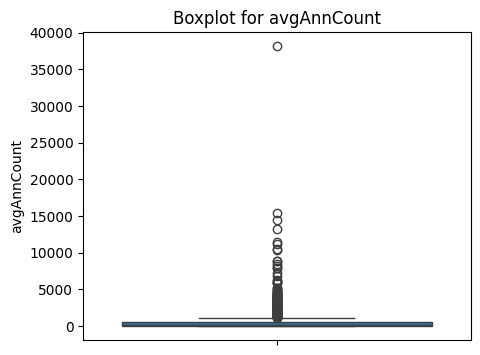

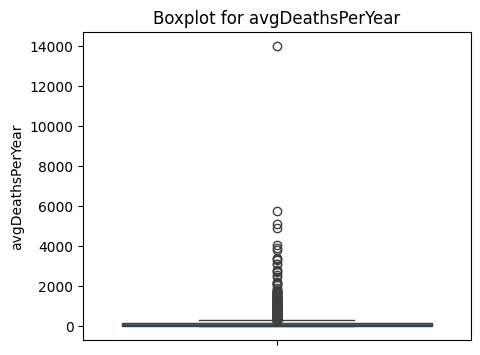

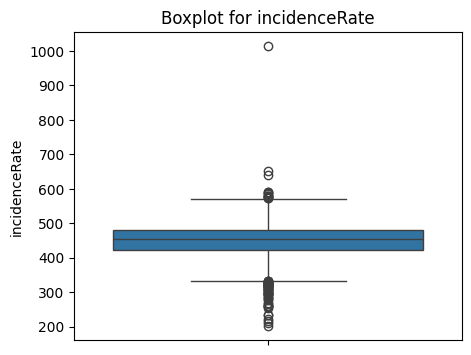

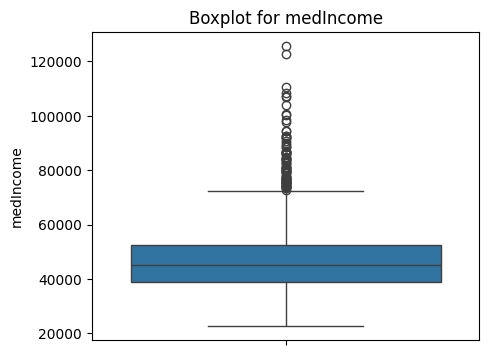

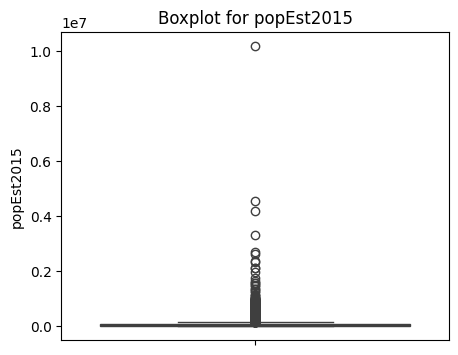

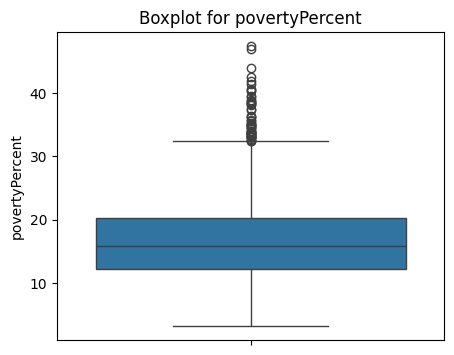

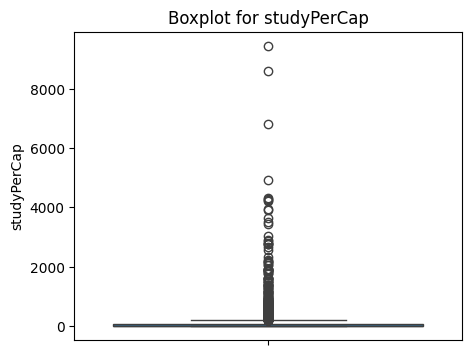

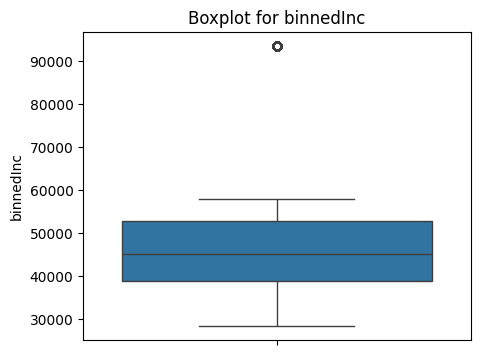

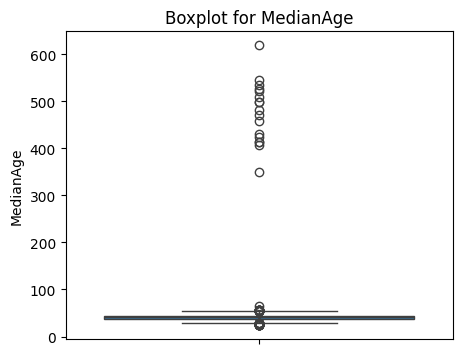

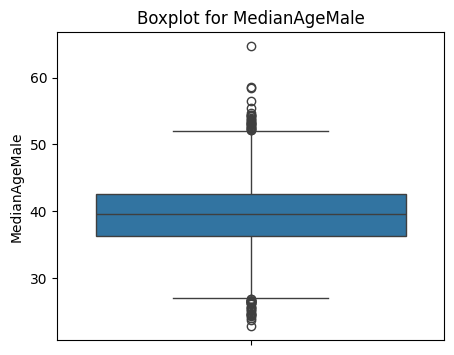

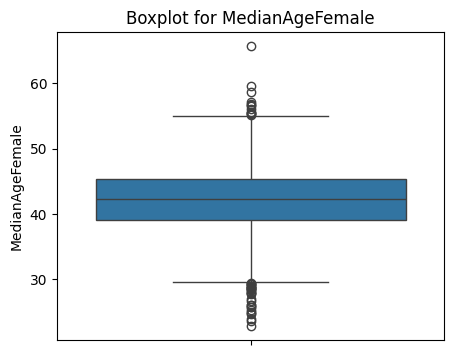

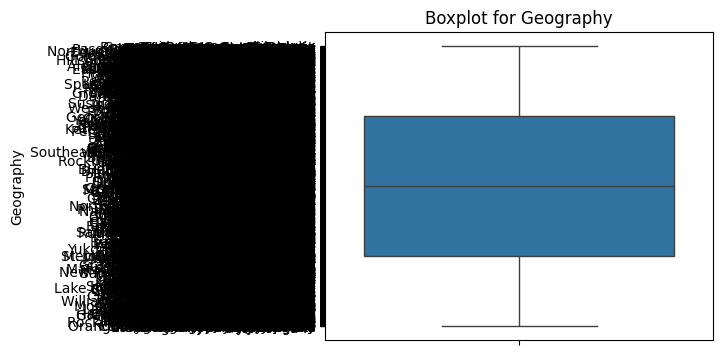

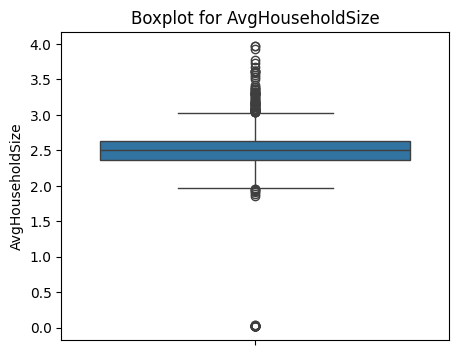

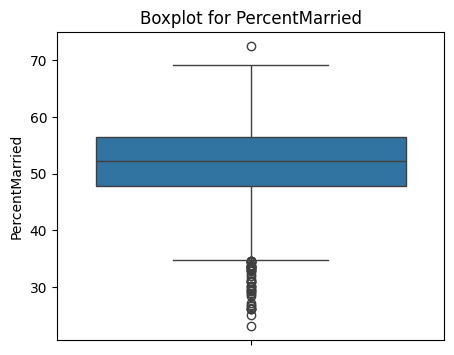

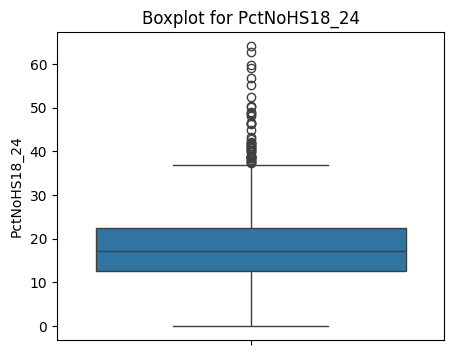

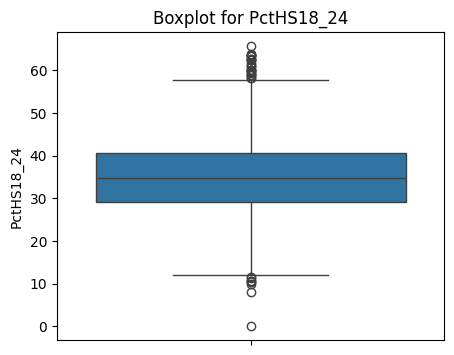

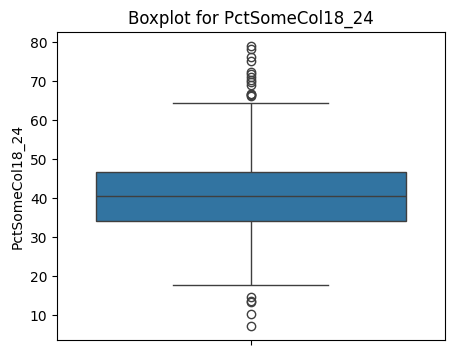

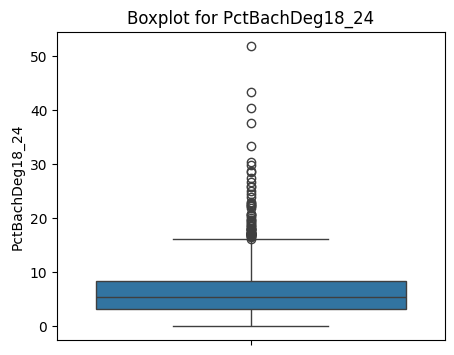

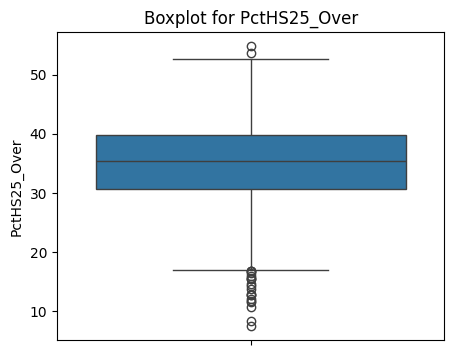

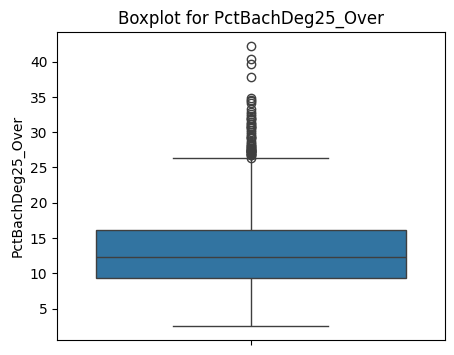

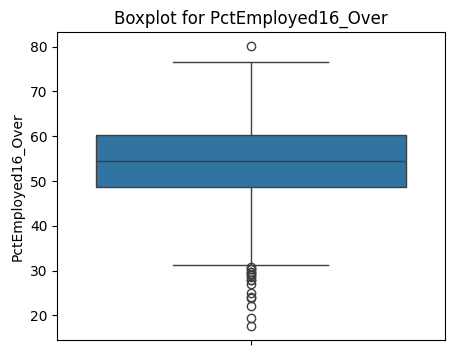

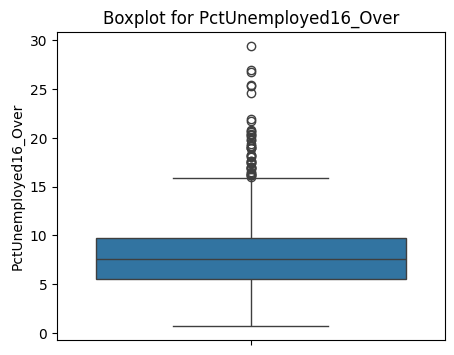

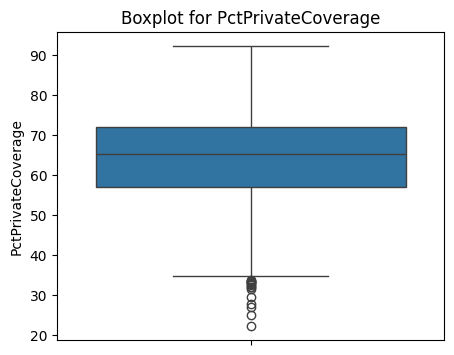

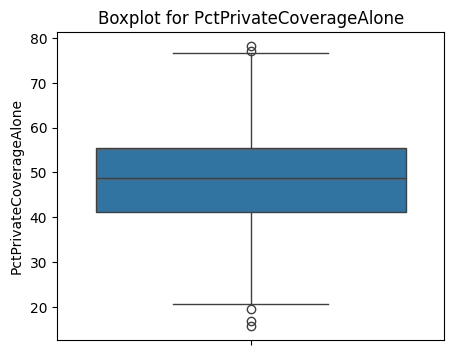

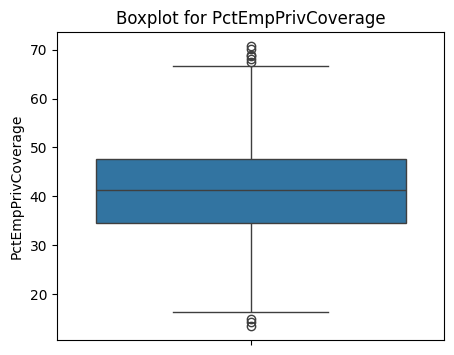

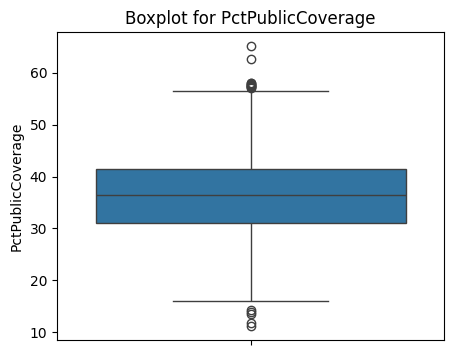

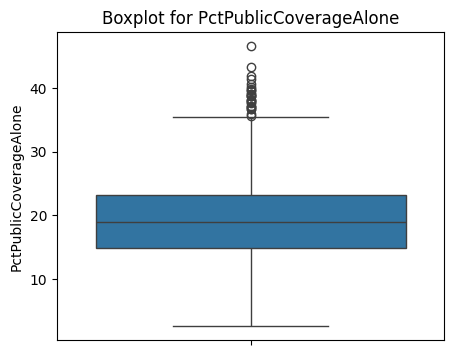

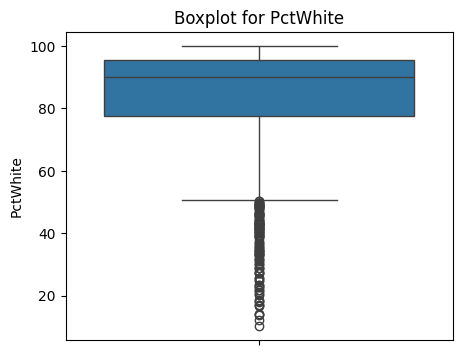

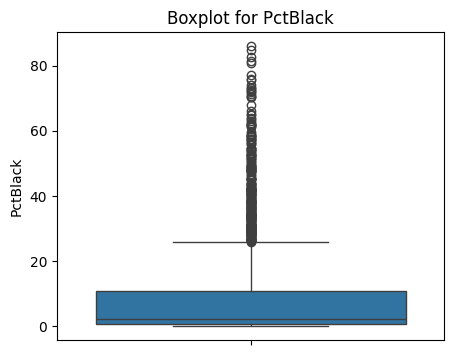

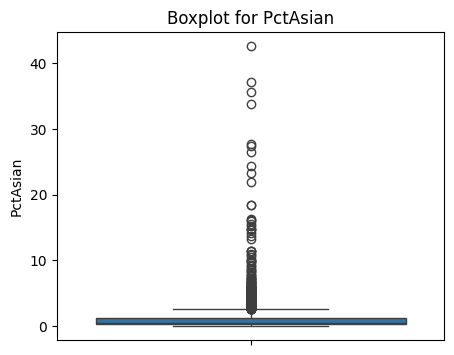

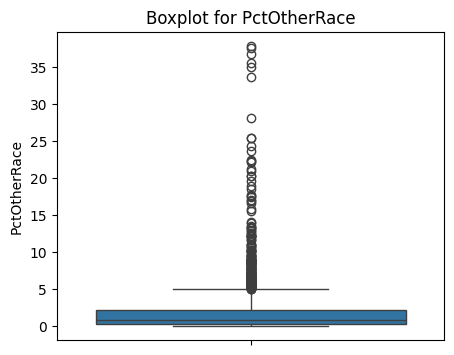

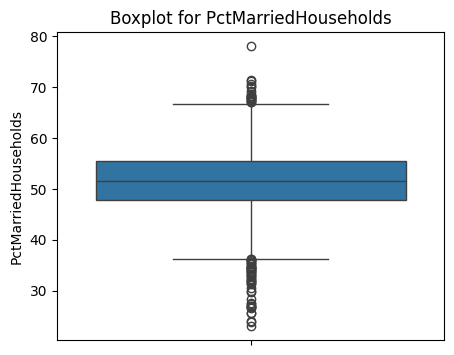

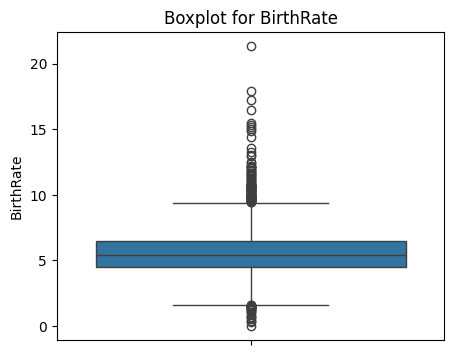

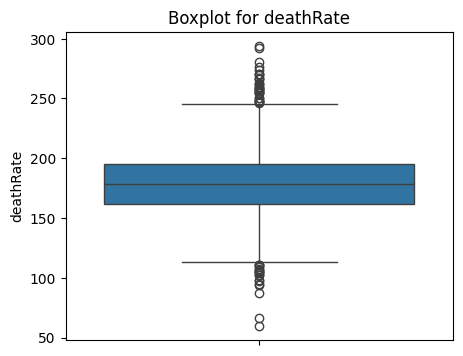

In [ ]:
for column in data.columns:
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(y=data[column], ax=ax)
    ax.set_title(f'Boxplot for {column}')
    plt.show()

Como se puede notar, las variables 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'PercentMarried', 'PctHS25_Over', 'studyPerCap' y 'PctEmployed16_Over' presentan outliers. Para no eliminar tantos datos se probarán los dos casos, en el que se quitan dichos outliers y en los que se imputan con el promedio. Por otra parte, la variable 'MedianAge' presenta valores incoherentes ya que muestra edades de más de 100 años. Todo esto se tendrá en cuenta en la preparación de los datos.

A continuación se presenta la cantidad de valores nulos que hay por característica.

In [ ]:
display(data.isnull().sum())

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1604
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          115
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     428
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

A continuación se presenta el porcentaje de los valores nulos por característica.

In [ ]:
display(data.isna().sum()/len(data))

avgAnnCount                0.000000
avgDeathsPerYear           0.000000
incidenceRate              0.000000
medIncome                  0.000000
popEst2015                 0.000000
povertyPercent             0.000000
studyPerCap                0.000000
binnedInc                  0.000000
MedianAge                  0.000000
MedianAgeMale              0.000000
MedianAgeFemale            0.000000
Geography                  0.000000
AvgHouseholdSize           0.000000
PercentMarried             0.000000
PctNoHS18_24               0.000000
PctHS18_24                 0.000000
PctSomeCol18_24            0.752345
PctBachDeg18_24            0.000000
PctHS25_Over               0.000000
PctBachDeg25_Over          0.000000
PctEmployed16_Over         0.053940
PctUnemployed16_Over       0.000000
PctPrivateCoverage         0.000000
PctPrivateCoverageAlone    0.200750
PctEmpPrivCoverage         0.000000
PctPublicCoverage          0.000000
PctPublicCoverageAlone     0.000000
PctWhite                   0


Como se puede notar, la variable 'PctSomeCol18_24' debe ser eliminada ya que más del 70% de los datos tienen valores null en esa característica. La variable 'PctEmployed16_Over' presenta pocos valores nulos (alrededor del 5%), por lo que se puede utilizar alguna técnica como imputación media para evitar datos faltantes. Por último, se debe eliminar la variable PctPrivateCoverageAlone ya que más del 20% (lo cual es considerado una cantidad muy alta) de los datos presentan valores nulos.

# 2. Preparacion de los datos

Se prepararán los datos de cuatro formas diferentes:
1. Quitando los outliers.
2. Quitando los outliers y quitando las variables menos correlacionadas con la variable objetivo.
3. Imputando los outliers con el promedio.
4. Imputando los outliers con el promedio y quitando las variables menos correlacionadas con la variable objetivo.

Cabe resaltar que en esta sección solo se separarán los datos entre aquellos sin outliers y aquellos en los que los outliers han sido imputados con el promedio. En la siguiente sección, antes de entrenar el modelo, se quitarán las variables menos correlacionadas para los dos casos.

## 2.1 Eliminación de *outliers* y correción de valores errados

Como mencionamos en el entendimiento de los datos, ya eliminamos los datos duplicados. Ahora debemos eliminar los outliers de cada variable, eliminar la variable Geography del conjunto de datos de entrenamiento y se preparan las variables con valores nulos.

In [ ]:
#Eliminamos outliers
data_eliminando_outliers = deepcopy(data)

data_eliminando_outliers = data_eliminando_outliers.loc[data_eliminando_outliers['avgAnnCount'] < 20000]
data_eliminando_outliers = data_eliminando_outliers.loc[data_eliminando_outliers['avgDeathsPerYear'] < 10000]
data_eliminando_outliers = data_eliminando_outliers.loc[data_eliminando_outliers['incidenceRate'] < 900]
data_eliminando_outliers = data_eliminando_outliers.loc[data_eliminando_outliers['popEst2015'] < 0.6e7]
data_eliminando_outliers = data_eliminando_outliers.loc[data_eliminando_outliers['PercentMarried'] < 70]
data_eliminando_outliers = data_eliminando_outliers.loc[data_eliminando_outliers['PctHS25_Over'] < 45]
data_eliminando_outliers = data_eliminando_outliers.loc[data_eliminando_outliers['PctEmployed16_Over'] < 70]
data_eliminando_outliers = data_eliminando_outliers.loc[data_eliminando_outliers['studyPerCap'] < 6000]

#Eliminamos Geography
valores_geography = data_eliminando_outliers['Geography'] # Se guarda esta variable para después
data_eliminando_outliers.drop(columns=['Geography'], inplace=True)

#Eliminamos columnas con muchos valores nulos
data_eliminando_outliers.drop(columns=['PctSomeCol18_24'], inplace=True)
data_eliminando_outliers.drop(columns=['PctPrivateCoverageAlone'], inplace=True)

#Reemplazamos los valores nulos por el promedio de la columna para 'PctEmployed16_Over'
promedio = data_eliminando_outliers['PctEmployed16_Over'].mean()
data_eliminando_outliers['PctEmployed16_Over'] = data_eliminando_outliers['PctEmployed16_Over'].fillna(promedio)

A continuación se visualizan los valores para cada característica para verificar que ya no queda ningún outlier.

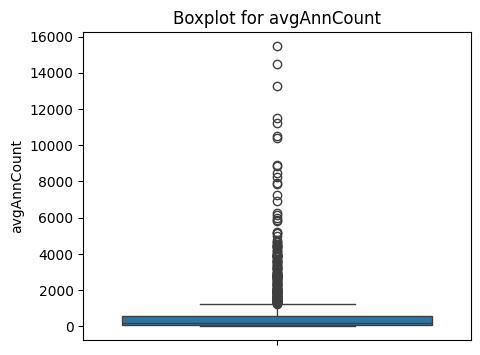

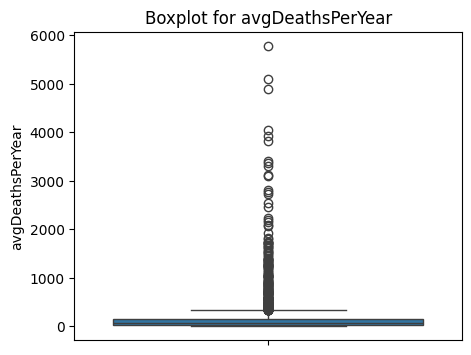

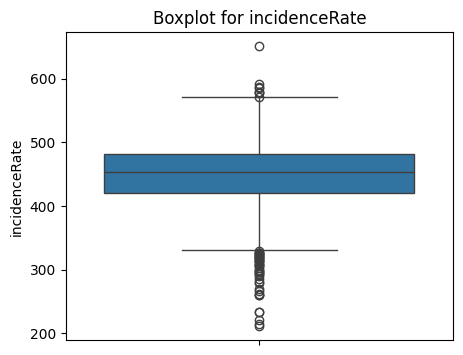

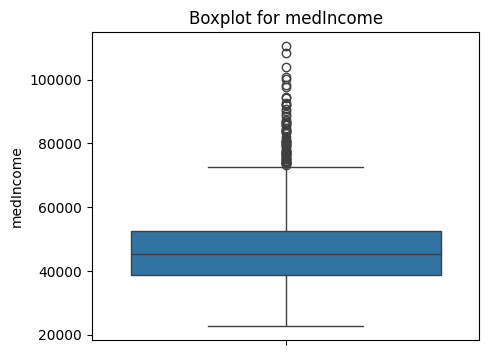

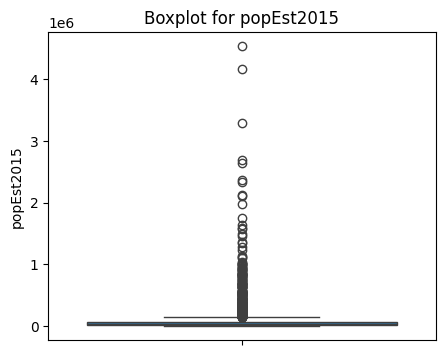

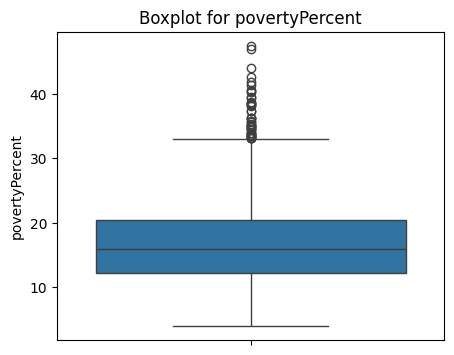

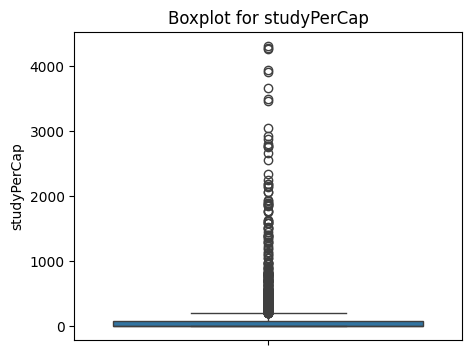

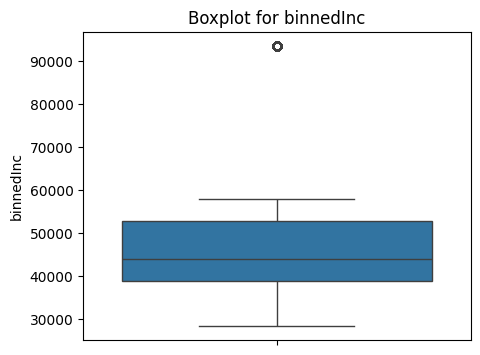

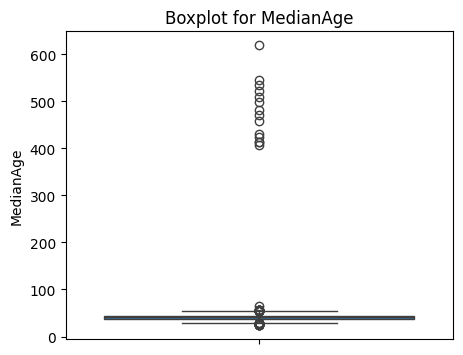

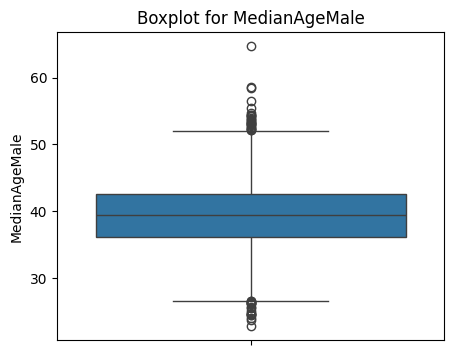

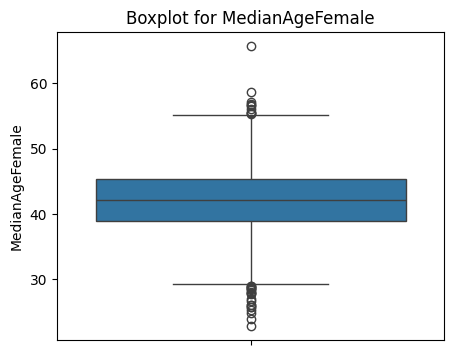

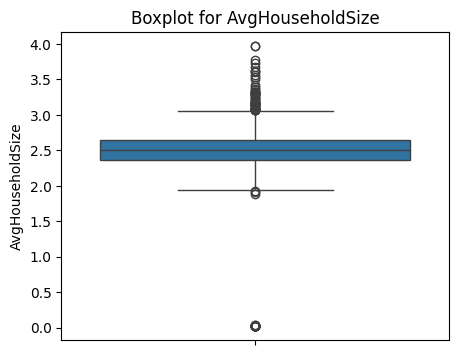

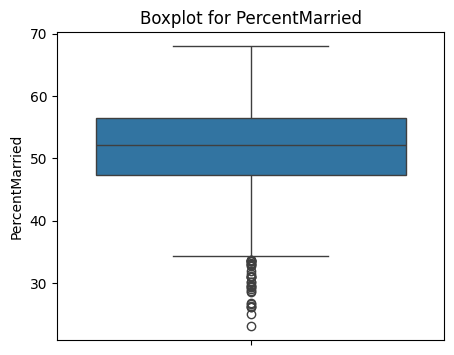

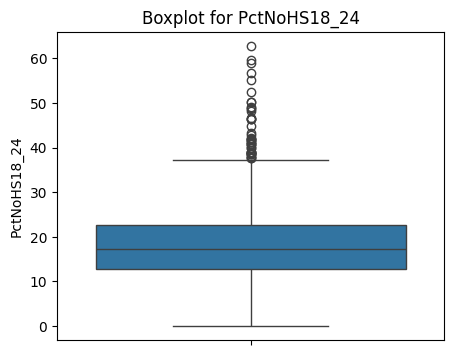

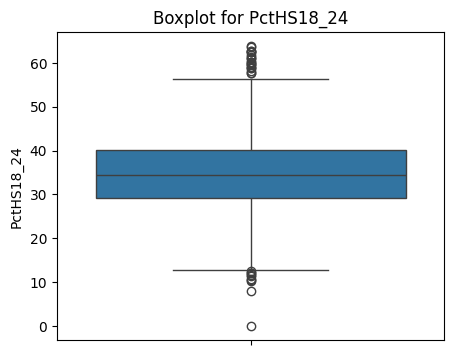

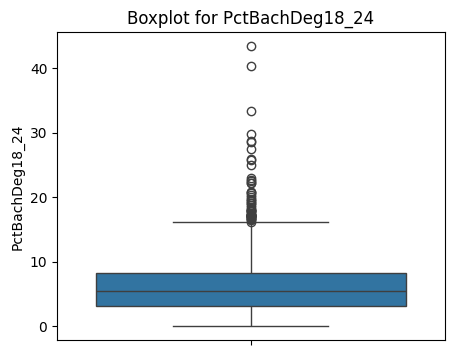

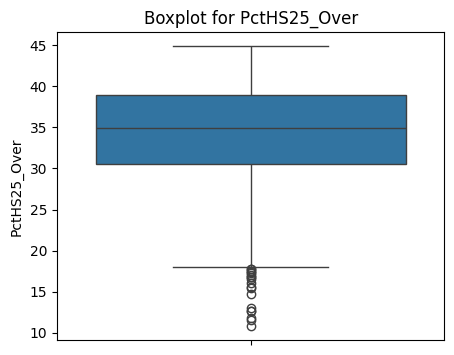

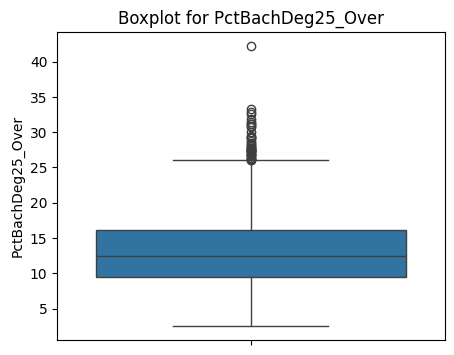

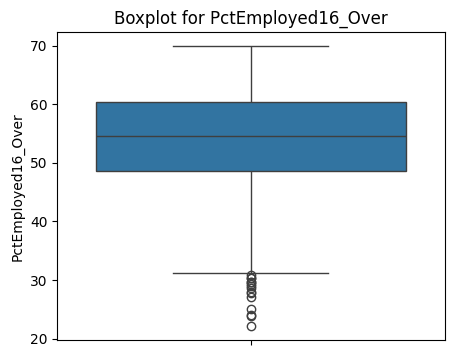

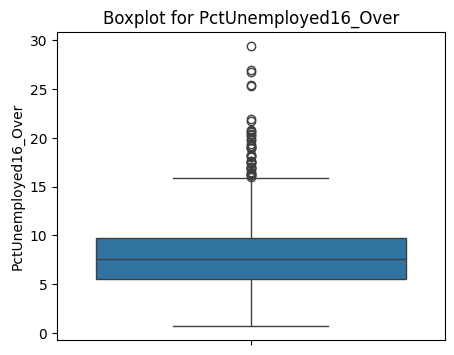

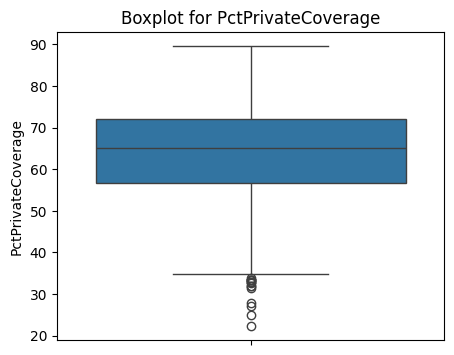

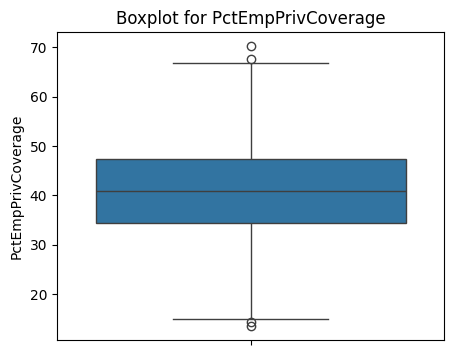

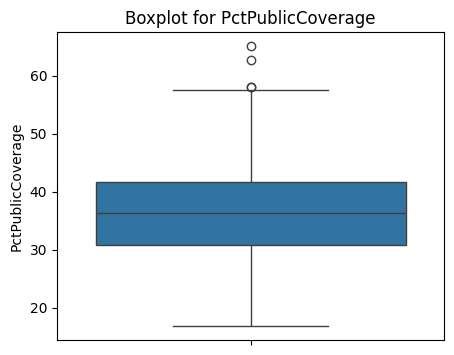

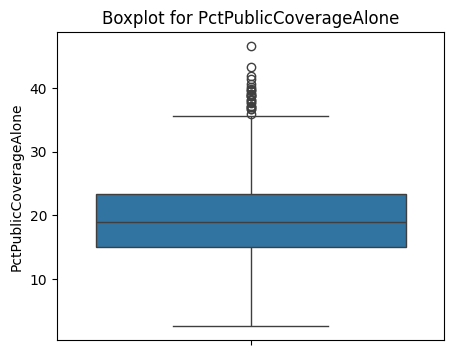

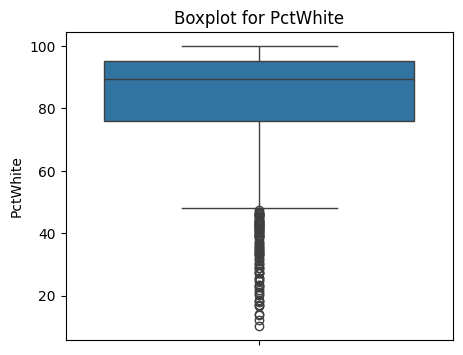

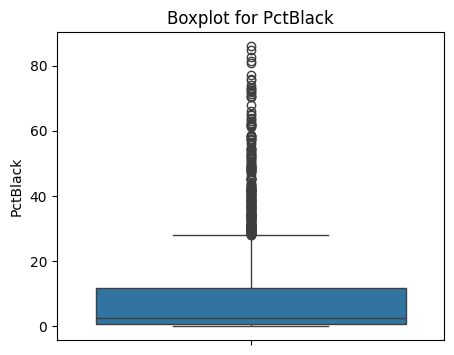

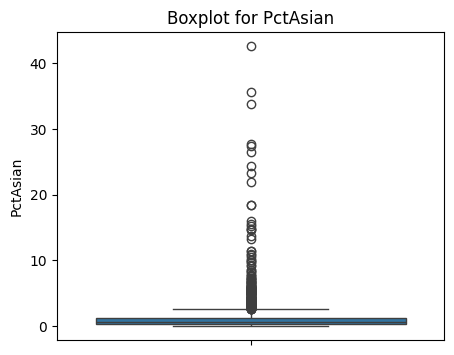

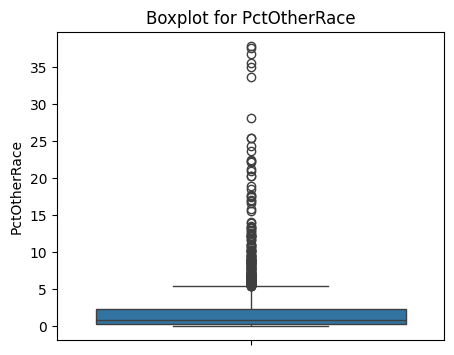

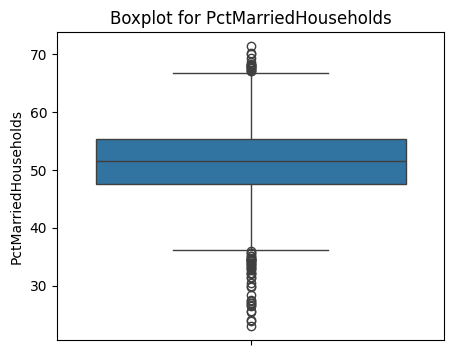

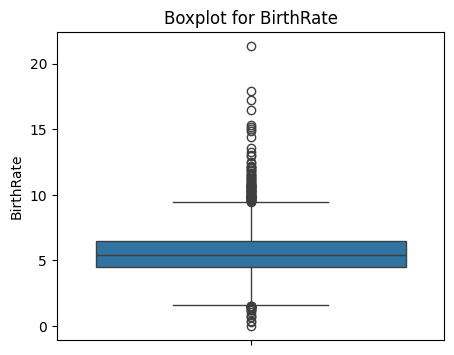

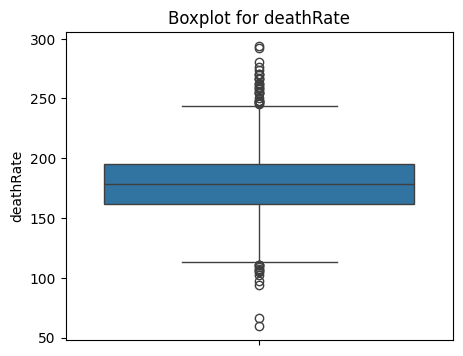

In [ ]:
for column in data_eliminando_outliers.columns:
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(y=data_eliminando_outliers[column], ax=ax)
    ax.set_title(f'Boxplot for {column}')
    plt.show()

Ahora procedemos a transformar los datos de la columna MedianAge que presentan edades de más de 100 años. Los datos son los siguientes:

In [ ]:
valores_mayores_a_X = data_eliminando_outliers[data_eliminando_outliers['MedianAge'] > 100]['MedianAge']

# Imprimir los valores filtrados
for valor in valores_mayores_a_X:
    print(valor)

470.4
406.8
414.0
430.8
523.2
508.8
481.2
424.8
546.0
458.4
412.8
619.2
535.2
498.0


Si dividiéramos por 10 el valor de esta edad tendríamos un valor decimal, por lo que no hay manera de corregir estos valores. Por este motivo, se procede a eliminar dichos valores.


In [ ]:
data_eliminando_outliers = data_eliminando_outliers[data_eliminando_outliers['MedianAge'] <= 100]

A continuación se muestra que ya no hay datos nulos.

In [ ]:
data_eliminando_outliers.isnull().sum()

avgAnnCount               0
avgDeathsPerYear          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
binnedInc                 0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctEmployed16_Over        0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
deathRate                 0
dtype: int64

## 2.2 Correlaciones
Una vez se han depurado los datos, se obtiene la matriz de correlación con el fin de ver las variables importantes para el entrenamiento de datos.

In [ ]:
corr = data_eliminando_outliers.corr()
corr.style.background_gradient (cmap = 'coolwarm')

Se consideraron dos maneras de eliminar las variables con respecto a las correlaciones:

**A. Sin relación con la variable objetivo**
Aquellas variables que presenten un valor de correlación muy cercano a 0 (cuyo valor absoluto sea menor a 0.1) con la variable objetivo (deathRate) serán eliminadas. Esto se hace ya que el valor de correlación nos indica qué tanta relevancia tiene una variable con la variable objetivo. Si es un valor cercano a -1 significa que están inversamente relacionadas, lo cual indica que dicha variable afecta el resultado final en gran medida. Si es un valor cercano a 1 significa que están directamente relacionadas, lo cual indica que dicha variable también afecta el resultado final en gran medida. Por el contrario, si el valor es cercano a 0, significa que no hay relación entre las dos variables, por lo que no es útil para el modelo. Es así como las variables que se eliminarán serán: 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24 y 'BirthRate'.

**B. Con alta correlación con otra variable**
Se eliminarán las variables que estén altamente correlacionadas con otras variables. Esto evita que choquen y muestren una falsa significancia en el modelo final. De este modo, se determinó que se eliminarán 'PercentMarried', 'avgDeathsPerYear', 'popEst2015', 'binnedInc', 'PctPrivateCoverage', 'PctPublicCoverageAlone', 'MedianAgeMale', 'MedianAgeFemale',

Cabe resaltar que se entrenarán tres modelos, uno con todas las variables, otro sin las variables menos correlacionadas y un tercero sin las variables más correlacionadas entre sí. De esta forma podremos visualizar ambos resultados y escoger el mejor modelo.

Una vez se han preparado los datos, se muestra la descripción final:

In [ ]:
descripcion_transpuesta = data_eliminando_outliers.describe().T
display(descripcion_transpuesta)

count           mean            std           min  \
avgAnnCount             1850.0     628.049085    1247.761372      6.000000   
avgDeathsPerYear        1850.0     188.101622     435.652624      3.000000   
incidenceRate           1850.0     448.297713      51.568584    211.100000   
medIncome               1850.0   46836.081622   11785.664846  22640.000000   
popEst2015              1850.0  104055.026486  282855.639305    829.000000   
povertyPercent          1850.0      17.064216       6.491355      4.000000   
studyPerCap             1850.0     148.867340     434.810407      0.000000   
binnedInc               1850.0   48552.448270   16605.183026  28429.050000   
MedianAge               1850.0      40.773946       5.225054     23.500000   
MedianAgeMale           1850.0      39.504541       5.270487     22.800000   
MedianAgeFemale         1850.0      42.118270       5.285305     22.800000   
AvgHouseholdSize        1850.0       2.483381       0.410767      0.022100   
PercentMarried          1850.0      51.637351       6.955156     23.100000   
PctNoHS18_24            1850.0      18.244378       8.159756      0.000000   
PctHS18_24              1850.0      34.645297       8.741339      0.000000   
PctBachDeg18_24         1850.0       6.169730       4.464276      0.000000   
PctHS25_Over            1850.0      34.339297       6.235114     10.800000   
PctBachDeg25_Over       1850.0      13.272595       5.111724      2.500000   
PctEmployed16_Over      1850.0      54.057730       8.166781     22.100000   
PctUnemployed16_Over    1850.0       7.902703       3.490240      0.700000   
PctPrivateCoverage      1850.0      64.096486      10.758056     22.300000   
PctEmpPrivCoverage      1850.0      40.936432       9.321325     13.500000   
PctPublicCoverage       1850.0      36.441135       7.704997     16.800000   
PctPublicCoverageAlone  1850.0      19.415243       6.126999      2.600000   
PctWhite                1850.0      83.113664      16.635387     10.199155   
PctBlack                1850.0       9.509655      14.877320      0.000000   
PctAsian                1850.0       1.273220       2.699260      0.000000   
PctOtherRace            1850.0       2.068002       3.640090      0.000000   
PctMarriedHouseholds    1850.0      51.099275       6.544582     22.992490   
BirthRate               1850.0       5.663477       1.991527      0.000000   
deathRate               1850.0     178.991351      26.834351     59.700000   

                                 25%           50%           75%           max  
avgAnnCount                81.000000    180.500000    532.750000  1.547000e+04  
avgDeathsPerYear           29.000000     64.000000    148.000000  5.780000e+03  
incidenceRate             420.825000    453.549422    481.400000  6.513000e+02  
medIncome               38744.000000  45192.500000  52373.750000  1.105070e+05  
popEst2015              11766.250000  27498.000000  68314.750000  4.538028e+06  
povertyPercent             12.200000     16.000000     20.600000  4.740000e+01  
studyPerCap                 0.000000      0.000000     80.156564  4.306062e+03  
binnedInc               38888.250000  43962.700000  52796.000000  9.356475e+04  
MedianAge                  37.525000     40.800000     43.800000  6.530000e+01  
MedianAgeMale              36.100000     39.500000     42.500000  6.470000e+01  
MedianAgeFemale            38.925000     42.200000     45.400000  6.570000e+01  
AvgHouseholdSize            2.360000      2.500000      2.640000  3.970000e+00  
PercentMarried             47.400000     52.200000     56.500000  6.800000e+01  
PctNoHS18_24               12.800000     17.200000     22.675000  6.270000e+01  
PctHS18_24                 29.125000     34.500000     40.000000  6.380000e+01  
PctBachDeg18_24             3.100000      5.400000      8.300000  4.340000e+01  
PctHS25_Over               30.500000     35.000000     39.000000  4.490000e+01  
PctBachDeg25_Over           9.500000     12.500000     16.100000  4.22

## 2.3 Remplazo de *outliers* con el promedio de la columna

Como mencionamos en el entendimiento de los datos, ya eliminamos los datos duplicados. Ahora debemos reemplazar los outliers de cada variable con el promedio de la columna, eliminar la variable Geography del conjunto de datos de entrenamiento y se preparan las variables con valores nulos.

In [ ]:
data.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'Geography', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'deathRate'],
      dtype='object')

In [ ]:
# Función para imputar los outliers
def imputacion_outliers(d):
  data_imputando_outliers = deepcopy(d)
  promedios = data_imputando_outliers.mean()
  umbrales = {
      'avgAnnCount': 20000,
      'avgDeathsPerYear': 10000,
      'incidenceRate': 900,
      'popEst2015': 0.6e7,
      'PercentMarried': 70,
      'PctHS25_Over': 45,
      'PctEmployed16_Over': 70,
      'studyPerCap': 6000
  }
  for columna, umbral in umbrales.items():
      promedio_columna = promedios[columna]
      data_imputando_outliers[columna] = data_imputando_outliers[columna].apply(lambda x: promedio_columna if x > umbral else x)


  #Eliminamos Geography
  columnas_a_eliminar = [
      'Geography', # incuantificable
      'PctSomeCol18_24', # muchos valores nulos
      'PctPrivateCoverageAlone' # muchos valores nulos
  ]

  for c in columnas_a_eliminar:
    if c in data_imputando_outliers.columns:
      data_imputando_outliers.drop(columns=[c], inplace=True)

  #Reemplazamos los valores nulos por el promedio de la columna para 'PctEmployed16_Over'
  promedio = data_imputando_outliers['PctEmployed16_Over'].mean()
  data_imputando_outliers['PctEmployed16_Over'] = data_imputando_outliers['PctEmployed16_Over'].fillna(promedio)

  return data_imputando_outliers


data_imputando_outliers = imputacion_outliers(data)

<ipython-input-23-45f589949d28>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  promedios = data_imputando_outliers.mean()


A continuación se visualizan los valores para cada característica para verificar que ya no queda ningún outlier.

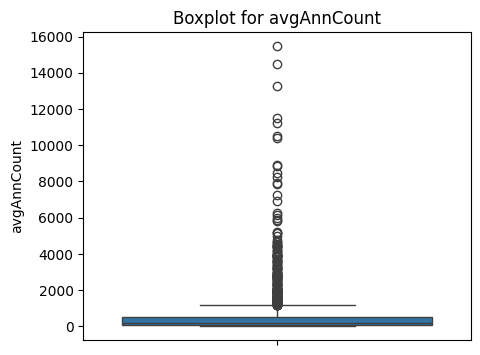

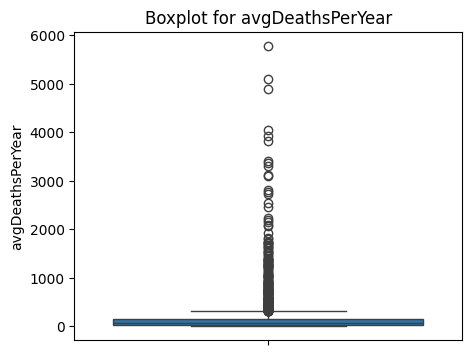

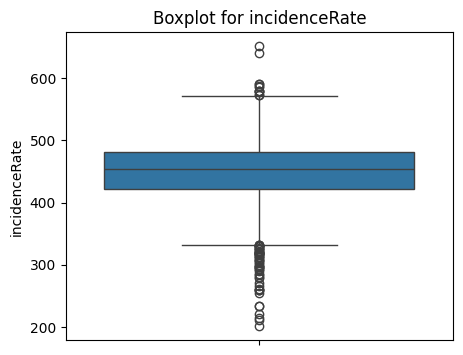

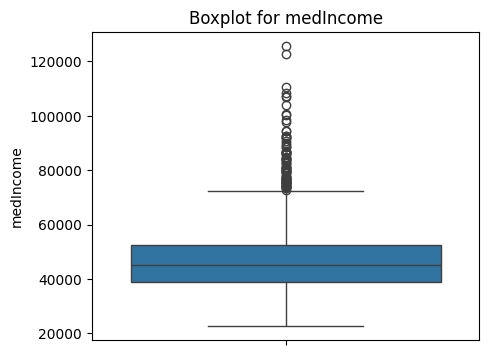

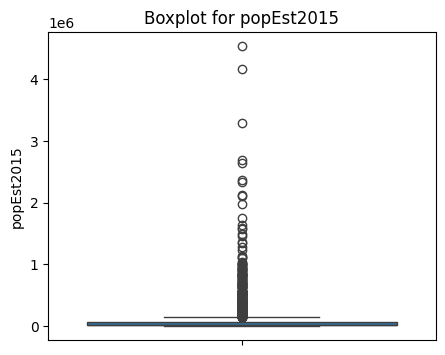

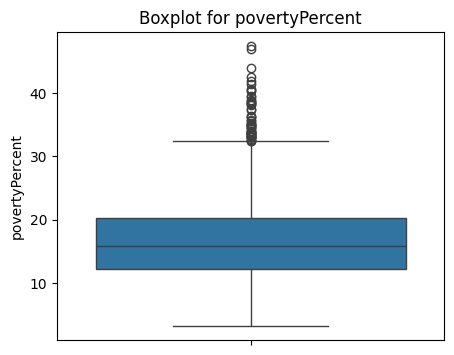

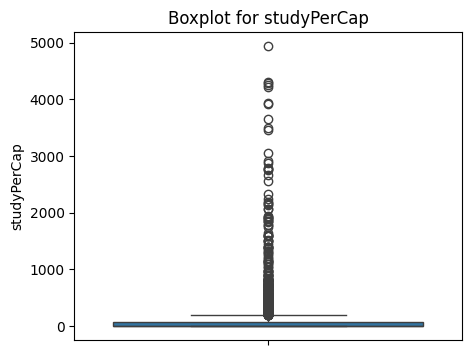

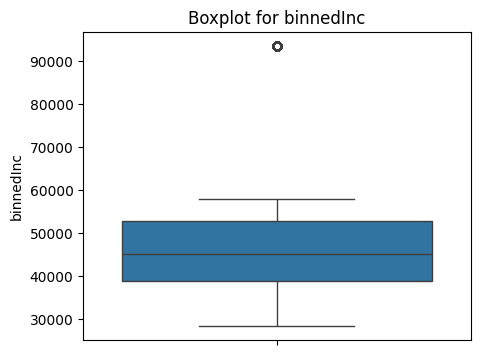

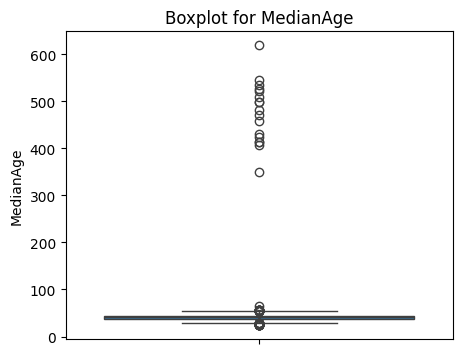

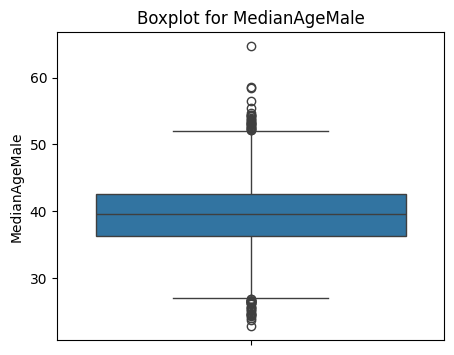

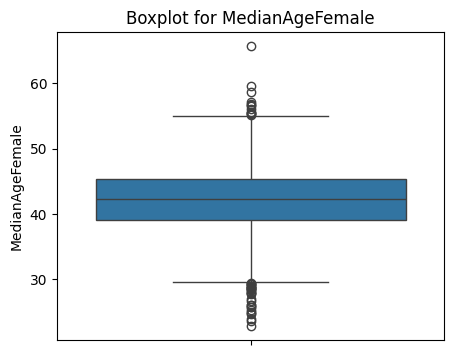

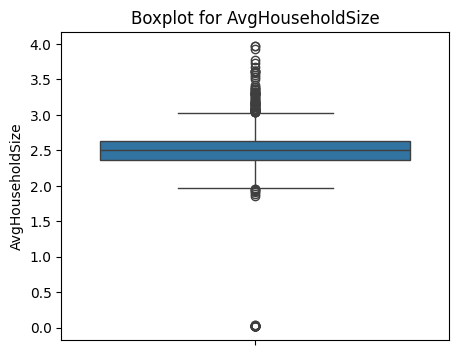

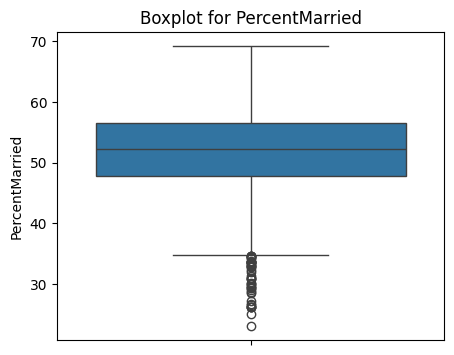

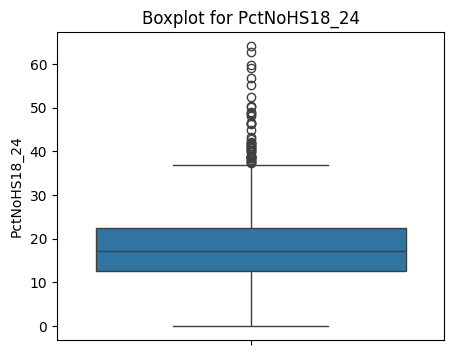

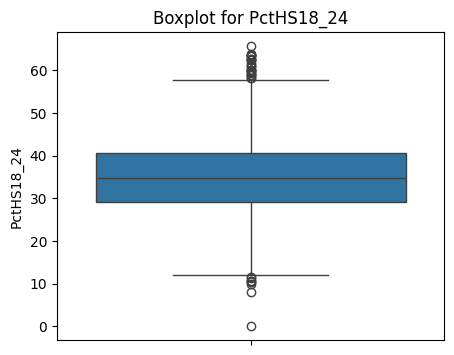

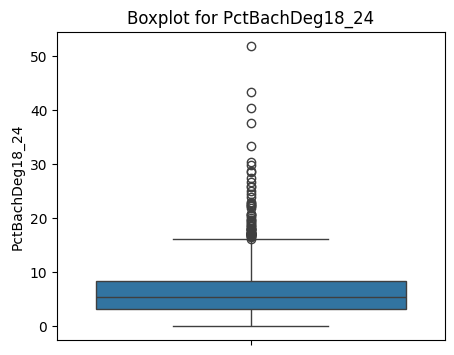

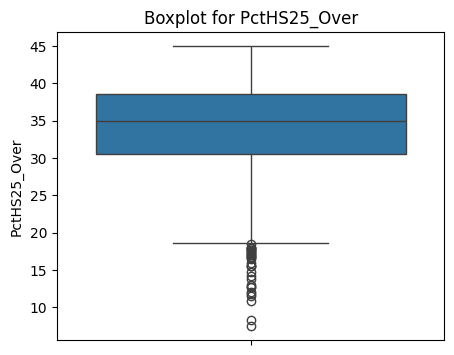

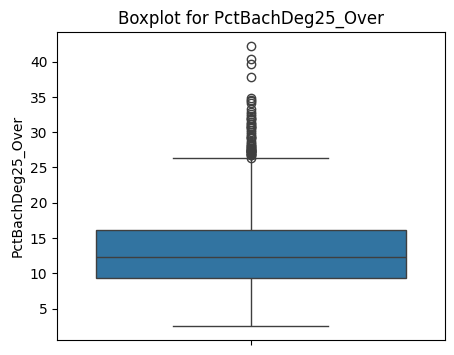

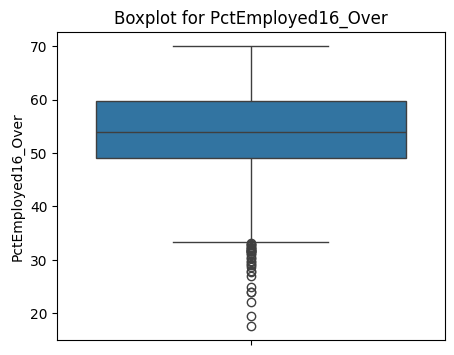

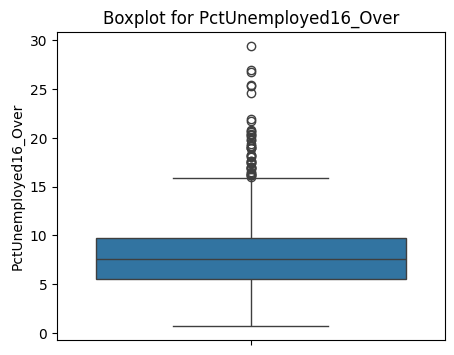

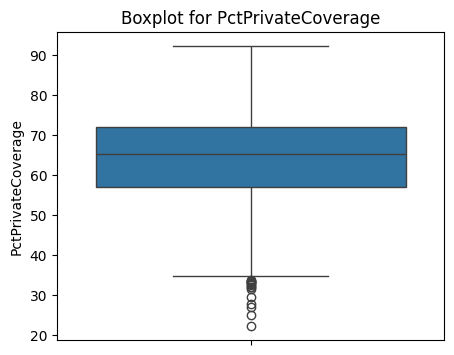

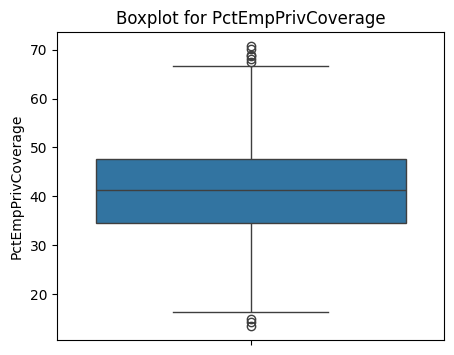

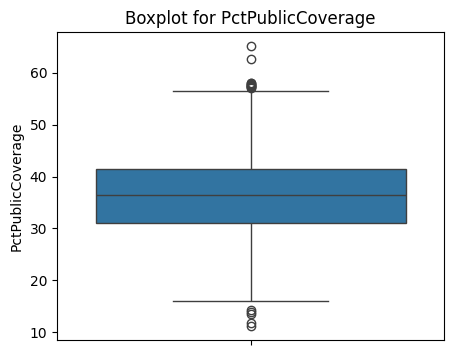

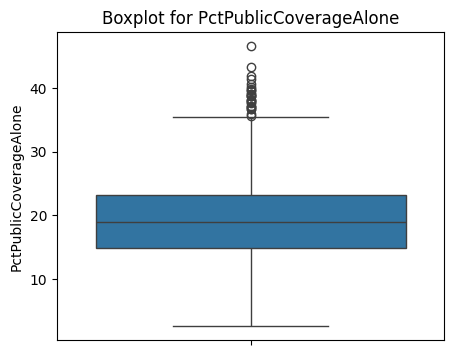

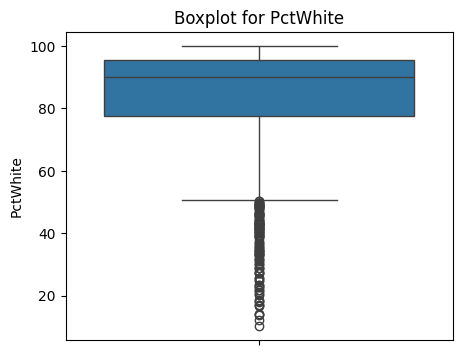

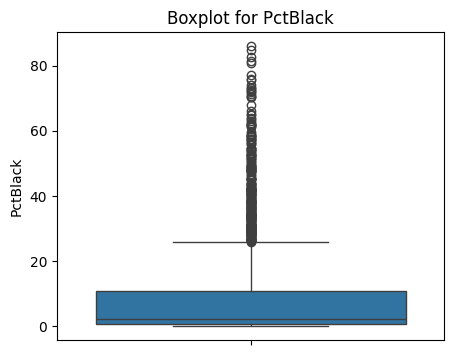

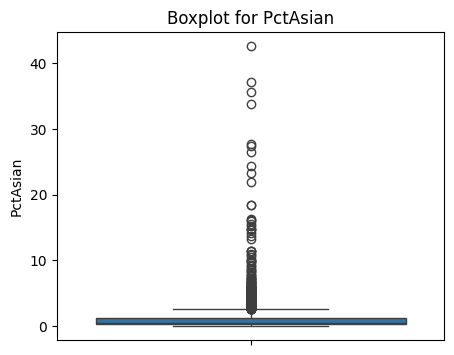

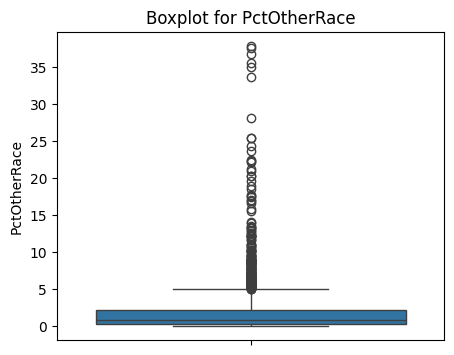

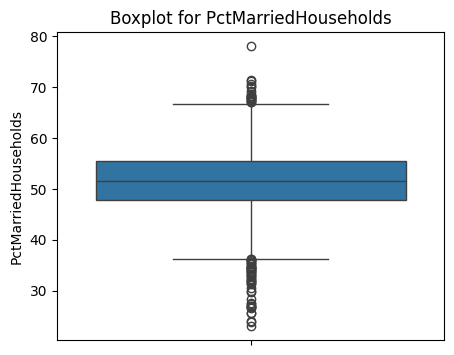

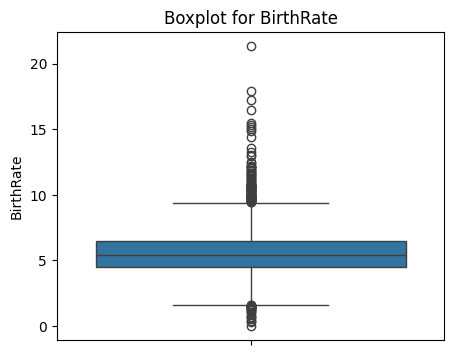

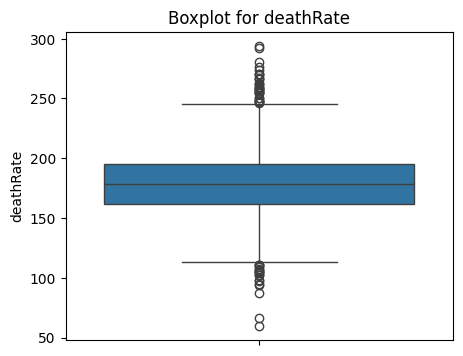

In [ ]:
for column in data_imputando_outliers.columns:
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(y=data_imputando_outliers[column], ax=ax)
    ax.set_title(f'Boxplot for {column}')
    plt.show()

Ahora procedemos a transformar los datos de la columna MedianAge que presentan edades de más de 100 años. Los datos son los siguientes:

In [ ]:
valores_mayores_a_X = data_imputando_outliers[data_imputando_outliers['MedianAge'] > 100]['MedianAge']

# Imprimir los valores filtrados
for valor in valores_mayores_a_X:
    print(valor)

525.6
470.4
406.8
414.0
430.8
523.2
508.8
481.2
424.8
349.2
546.0
498.0
458.4
412.8
619.2
535.2
498.0


Si dividiéramos por 10 el valor de esta edad tendríamos un valor decimal, por lo que no hay manera de corregir estos valores. Por este motivo, se procede a eliminar dichos valores.

In [ ]:
data_imputando_outliers = data_imputando_outliers[data_imputando_outliers['MedianAge'] <= 100]

A continuación se muestra que ya no hay datos nulos.

In [ ]:
data_imputando_outliers.isnull().sum()

avgAnnCount               0
avgDeathsPerYear          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
binnedInc                 0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctEmployed16_Over        0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
deathRate                 0
dtype: int64

Una vez se han depurado los datos, se obtiene la matriz de correlación con el fin de ver las variables importantes para el entrenamiento de datos.

In [ ]:
corr = data_imputando_outliers.corr()
corr.style.background_gradient (cmap = 'coolwarm')

 A partir de la matriz de correlación tomaremos decisiones a partir del siguiente criterio: Aquellas variables que presenten un valor de correlación muy cercano a 0 (cuyo valor absoluto sea menor a 0.1) con la variable objetivo (deathRate) serán eliminadas. Esto se hace ya que el valor de correlación nos indica qué tanta relevancia tiene una variable con la variable objetivo. Si es un valor cercano a -1 significa que están inversamente relacionadas, lo cual indica que dicha variable afecta el resultado final en gran medida. Si es un valor cercano a 1 significa que están directamente relacionadas, lo cual indica que dicha variable también afecta el resultado final en gran medida. Por el contrario, si el valor es cercano a 0, significa que no hay relación entre las dos variables, por lo que no es útil para el modelo. Es así como las variables que se eliminarán serán: 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24 y 'BirthRate'.

Cabe resaltar que se entrenarán dos modelos, uno con todas las variables y otro sin las variables menos correlacionadas. De esta forma podremos visualizar ambos resultados y escoger el mejor modelo.

Una vez se han preparado los datos, se muestra la descripción final:

In [ ]:
descripcion_transpuesta = data_imputando_outliers.describe().T
display(descripcion_transpuesta)

count          mean            std           min  \
avgAnnCount             2115.0    595.716412    1185.723462      6.000000   
avgDeathsPerYear        2115.0    177.030514     411.067872      3.000000   
incidenceRate           2115.0    448.459563      52.216724    201.300000   
medIncome               2115.0  47010.159811   12117.729183  22640.000000   
popEst2015              2115.0  97589.684353  266685.561126    829.000000   
povertyPercent          2115.0     16.907991       6.419594      3.200000   
studyPerCap             2115.0    147.482775     437.624510      0.000000   
binnedInc               2115.0  48673.348345   16674.392866  28429.050000   
MedianAge               2115.0     40.823830       5.175658     23.500000   
MedianAgeMale           2115.0     39.567423       5.203795     22.800000   
MedianAgeFemale         2115.0     42.149835       5.271870     22.800000   
AvgHouseholdSize        2115.0      2.478296       0.422295      0.022100   
PercentMarried          2115.0     51.739696       6.910066     23.100000   
PctNoHS18_24            2115.0     18.145674       8.098612      0.000000   
PctHS18_24              2115.0     34.973712       9.018509      0.000000   
PctBachDeg18_24         2115.0      6.200757       4.638082      0.000000   
PctHS25_Over            2115.0     34.195578       6.252527      7.500000   
PctBachDeg25_Over       2115.0     13.219574       5.406478      2.500000   
PctEmployed16_Over      2115.0     53.860908       7.911490     17.600000   
PctUnemployed16_Over    2115.0      7.840331       3.433301      0.700000   
PctPrivateCoverage      2115.0     64.381939      10.645345     22.300000   
PctEmpPrivCoverage      2115.0     41.233333       9.303163     13.500000   
PctPublicCoverage       2115.0     36.329598       7.845382     11.200000   
PctPublicCoverageAlone  2115.0     19.298534       6.134135      2.600000   
PctWhite                2115.0     83.707811      16.552907     10.199155   
PctBlack                2115.0      9.132783      14.640395      0.000000   
PctAsian                2115.0      1.259367       2.747156      0.000000   
PctOtherRace            2115.0      1.954232       3.491491      0.000000   
PctMarriedHouseholds    2115.0     51.225046       6.563731     22.992490   
BirthRate               2115.0      5.642459       1.980486      0.000000   
deathRate               2115.0    179.000095      27.437244     59.700000   

                                 25%           50%           75%           max  
avgAnnCount                77.000000    174.000000    510.000000  1.547000e+04  
avgDeathsPerYear           28.000000     62.000000    140.000000  5.780000e+03  
incidenceRate             421.500000    453.549422    481.600000  6.513000e+02  
medIncome               38858.500000  45219.000000  52335.000000  1.256350e+05  
popEst2015              11545.500000  26928.000000  66220.000000  4.538028e+06  
povertyPercent             12.200000     15.900000     20.300000  4.740000e+01  
studyPerCap                 0.000000      0.000000     79.781085  4.938272e+03  
binnedInc               38888.250000  46611.300000  52796.000000  9.356475e+04  
MedianAge                  37.700000     40.900000     43.900000  6.530000e+01  
MedianAgeMale              36.300000     39.600000     42.600000  6.470000e+01  
MedianAgeFemale            39.050000     42.300000     45.400000  6.570000e+01  
AvgHouseholdSize            2.360000      2.500000      2.630000  3.970000e+00  
PercentMarried             47.750000     52.300000     56.450000  6.920000e+01  
PctNoHS18_24               12.700000     17.100000     22.500000  6.410000e+01  
PctHS18_24                 29.200000     34.700000     40.700000  6.570000e+01  
PctBachDeg18_24             3.100000      5.400000      8.300000  5.180000e+01  
PctHS25_Over               30.650000     34.949578     38.700000  4.500000e+01  
PctBachDeg25_Over           9.300000     12.300000     16.100000  4.220000e+01  
PctEmployed16_Over   

# 3. Modelado

Una vez tenemos los datos preparados, procedemos a entrenar el modelo con los datos normalizados. Cabe resaltar que para cada conjunto de datos (quitando los outliers e imputando los outliers) se evaluarán dos modelos, uno con todas las variables y otro sin las variables menos correlacionadas con la variable objetivo, mencionadas anteriormente.

Para esto, primero se debe dividir los datos entre las variables y las etiquetas. Posteriormente, se dividen entre datos de prueba y datos de validación, esto con el objetivo de poder cuantificar los modelos al finalizar el entrenamiento. Finalmente, los datos se normalizan y con esto estarían listos para entrenar el modelo utilizado que en este caso es Linear Regression de la librería Sklearn.

## 3.1. Métricas a utilizar

Para evaluar los modelos se utilizarán varias métricas que analizan diversos aspectos sobre el modelo. Las dos categorías de métricas son: error y varianza. Utilizar indicadores de estos dos grupos provee una imagen más completa sobre el desempeño del modelo. A continuación, se presentan las métricas con sus respectivas justificaciones:

**Métricas basadas en error**
1.   *Error cuadrático medio (MSE)*: esta métrica mide el promedio de los cuadrados de las diferencias entre los valores predichos por el modelo y los valores observados reales. Cuanto menor sea el valor del MSE, mejor será el ajuste del modelo. Es una medida estándar que penaliza las desviaciones grandes de las observaciones reales y es sensible a los outliers.
2.   *Raíz cuadrada de ECM (RMSE)*:  es otra medida estándar que penaliza las desviaciones grandes de las observaciones reales. Esto lo hace más suave que RMSE. Sin embargo, también es sensible a los outliers.
**Métricas basadas en varianza**
3.   *R2*: es una métrica que evalúa la calidad de un modelo de regresión e indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes en el modelo. De esta forma, un valor de R2 cercano a 1 indica un buen ajuste del modelo a los datos, mientras que un valor cercano a 0 indica que el modelo no es capaz de explicar la variabilidad en los datos. Sin embargo, puede ser un indicador muy optimista.
4.   *R2 Ajustado*: penaliza la inclusión de variables irrelevantes. Esto es especialmente útil dada la pregunta planteada sobre los dos posibles modelos. Puede ser demasiado pesimista.



In [ ]:
# Se definen algunas de las métricas con funciones personalizadas

def adjusted_r2_score(y_true, y_pred):
  """
  Función personalizada para R2 ajustado

  Args:
      y_true: Valores verdaderos
      y_pred: Valores estimados

  Returns:
      R2 ajustado
  """
  n_features = y_true.shape[1]
  n_samples = y_true.shape[0]
  r2 = r2_score(y_true, y_pred)
  adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)
  return adjusted_r2


def root_mean_squared_error(y_true, y_pred):
  """
  Función personalizada para RMSE

  Args:
      y_true: Valores verdaderos
      y_pred: Valores estimados

  Returns:
      RMSE ajustado
  """
  return mean_squared_error(y_true, y_pred, squared=False)

In [ ]:
# Se guardan las funciones de las métricas para ser evaluadas en conjunto

metricas_de_validacion = {
    "MSE": mean_squared_error, # mejor es 0
    "RMSE": root_mean_squared_error, # mejor es 0
    "R2": r2_score, # mejor es 1
    "R2 Ajustado": adjusted_r2_score, # mejor es 1
}

In [ ]:
def evaluar_metricas(metricas_de_validacion, y_true, y_pred):
  """
  Evalúa los datos verdaderos con las predicciones
  usando algunos métodos de validación

  Args:
      metricas_de_validación: diccionario de nombres, funciones
      y_true: valores verdaderos
      y_pred: valores predecidos
  """

  print("--- Evaluación de métricas del modelo de regresión lineal")
  for k, f in metricas_de_validacion.items():
    print(k, ":", f(y_true, y_pred))


## 3.2. Modelos quitando los Outliers

In [ ]:
#Dividir los datos en variables y etiqueta
y = data_eliminando_outliers['deathRate']
x = data_eliminando_outliers.drop(['deathRate'], axis=1)

#Dividir los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state=42)
print("Los datos se dividieron en {} datos de entrenamiento y {} datos de prueba".format(x_train.shape[0],x_test.shape[0]))

x_train_mejor = x_train

y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)
y_train_mejor = y_train

#Regresion lineal No se usa gridsearch por que no hay parametros para sintonizar se podria usar cross validation pero no lo hemos visto en clase

Los datos se dividieron en 1480 datos de entrenamiento y 370 datos de prueba


In [ ]:
# Regresion lineal con todas las variables
#Crear el modelo
lr_mejor = LinearRegression()
#Entrenar el modelo
lr_mejor.fit(x_train,y_train)

#Realizar validacion
y_pred = lr_mejor.predict(x_test)

evaluar_metricas(metricas_de_validacion, y_test, y_pred)

--- Evaluación de métricas del modelo de regresión lineal
MSE : 287.87887607710513
RMSE : 16.966993725380615
R2 : 0.5945549811148375
R2 Ajustado : 0.5934532283461278


In [ ]:
# Regresion lineal quitando variables con menor correlacion

col_quitar = ['studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24', 'BirthRate'] #Poner todas las que sean necesarias
x_train_sin_var = x_train[x_train.columns.difference(col_quitar)]
lr2 = LinearRegression()
lr2.fit(x_train_sin_var, y_train)


x_test_sin_var = x_test[x_test.columns.difference(col_quitar)]
y_pred_sin_var = lr2.predict(x_test_sin_var)

# Realizar validación
evaluar_metricas(metricas_de_validacion, y_test, y_pred_sin_var)

--- Evaluación de métricas del modelo de regresión lineal
MSE : 301.49245703761767
RMSE : 17.36353814859223
R2 : 0.575381783467118
R2 Ajustado : 0.5742279296178439


In [ ]:
# Regresión lineal quitando variables con mayor correlacion entre ellas

# se eliminan las columnas de alta correlacion
data_baja_correlacion = deepcopy(data_eliminando_outliers)

columnas_a_eliminar = [
    "PercentMarried",
    "avgDeathsPerYear",
    "popEst2015",
    "binnedInc",
    "PctPrivateCoverage",
    "PctPublicCoverageAlone",
    "MedianAgeMale",
    "MedianAgeFemale",
]

# se eliminan las columna con mayor correlación entre ellas
for c in columnas_a_eliminar:
  if c in data_baja_correlacion.columns:
    data_baja_correlacion.drop(columns=[c], inplace=True)

In [ ]:
new_y = data_baja_correlacion['deathRate']
new_x = data_baja_correlacion.drop(columns=['deathRate'], axis=1)

x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(new_x,new_y,train_size = 0.8,random_state=42)

y_train_bc = pd.DataFrame(y_train_bc)
y_test_bc = pd.DataFrame(y_test_bc)


avgAnnCount  incidenceRate      medIncome  povertyPercent  \
count   1480.000000    1480.000000    1480.000000     1480.000000   
mean     645.687461     448.034316   46847.819595       17.081081   
std     1327.685777      52.666363   11936.254729        6.484307   
min        6.000000     211.100000   24035.000000        4.000000   
25%       78.750000     420.275000   38651.000000       12.100000   
50%      178.000000     453.549422   45186.500000       16.100000   
75%      526.500000     481.850000   52398.000000       20.625000   
max    15470.000000     651.300000  110507.000000       47.400000   

       studyPerCap    MedianAge  AvgHouseholdSize  PctNoHS18_24   PctHS18_24  \
count  1480.000000  1480.000000       1480.000000   1480.000000  1480.000000   
mean    147.667089    40.778176          2.482754     18.368986    34.629865   
std     431.831837     5.260161          0.415086      8.181177     8.817990   
min       0.000000    23.500000          0.022100      0.000000     0.000000   
25%       0.000000    37.500000          2.360000     12.800000    29.100000   
50%       0.000000    40.800000          2.500000     17.200000    34.400000   
75%      86.832236    43.900000          2.640000     23.000000    40.100000   
max    4306.061610    65.300000          3.970000     62.700000    63.800000   

       PctBachDeg18_24  ...  PctEmployed16_Over  PctUnemployed16_Over  \
count      1480.000000  ...         1480.000000           1480.000000   
mean          6.211014  ...           54.101014              7.891486   
std           4.500264  ...            8.166736              3.496856   
min           0.000000  ...           22.100000              0.700000   
25%           3.100000  ...           48.600000              5.500000   
50%           5.400000  ...           54.700000              7.600000   
75%           8.400000  ...           60.500000              9.800000   
max          43.400000  ...           69.900000             29.400000   

       PctEmpPrivCoverage  PctPublicCoverage     PctWhite     PctBlack  \
count         1480.000000        1480.000000  1480.000000  1480.000000   
mean            40.939392          36.439662    83.247821     9.437615   
std              9.426737           7.775776    16.654517    14.902908   
min             13.500000          17.100000    10.199155     0.000000   
25%             34.300000          30.900000    76.668938     0.634472   
50%             41.000000          36.300000    89.475792     2.371081   
75%             47.400000          41.725000    95.099600    11.151655   
max             70.200000          65.100000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  1480.000000   1480.000000           1480.000000  1480.000000  
mean      1.265063      2.091791             51.069879     5.660239  
std       2.625421      3.743416              6.558538     2.004332  
min       0.000000      0.000000             23.885628     0.000000  
25%       0.270812      0.320027             47.574068     4.510420  
50%       0.542617      0.875004             51.507833     5.395384  
75%       1.176604      2.310797             55.309628     6.544431  
max      35.640183     37.859023             71.400100    21.326165  

[8 rows x 22 columns]

In [ ]:
lr3 = LinearRegression()
lr3.fit(x_train_bc, y_train_bc)

y_pred_var = lr3.predict(x_test_bc)
evaluar_metricas(metricas_de_validacion, y_test_bc, y_pred_var)


--- Evaluación de métricas del modelo de regresión lineal
MSE : 334.0092317992707
RMSE : 18.27591945154253
R2 : 0.5412106903748701
R2 Ajustado : 0.5401209295444067


## 3.3. Modelos imputando los outliers con el promedio

In [ ]:
#Dividir los datos en variables y etiqueta
y = data_imputando_outliers['deathRate']
x = data_imputando_outliers.drop(['deathRate'], axis=1)

#Dividir los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state=42)
print("Los datos se dividieron en {} datos de entrenamiento y {} datos de prueba".format(x_train.shape[0],x_test.shape[0]))

#Normalizar los datos
scaler_x = StandardScaler()
norm_x_train = scaler_x.fit_transform(x_train)
x_train = pd.DataFrame(norm_x_train,columns=x_train.columns)
x_test = pd.DataFrame(scaler_x.transform(x_test), columns=x_train.columns)

y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

#Regresion lineal No se usa gridsearch por que no hay parametros para sintonizar se podria usar cross validation pero no lo hemos visto en clase


#Regresion lineal con todas las variables
#Crear el modelo
lr = LinearRegression()

#Entrenar el modelo
lr.fit(x_train,y_train)


#Realizar validacion
y_pred = lr.predict(x_test)

evaluar_metricas(metricas_de_validacion, y_test, y_pred)

Los datos se dividieron en 1692 datos de entrenamiento y 423 datos de prueba
--- Evaluación de métricas del modelo de regresión lineal
MSE : 331.175773971317
RMSE : 18.19823546312436
R2 : 0.5451026790894816
R2 Ajustado : 0.5440221628877939


In [ ]:
#Regresion lineal quitando variables

col_quitar = ['studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24', 'BirthRate'] #Poner todas las que sean necesarias
x_train_sin_var = x_train[x_train.columns.difference(col_quitar)]
lr2 = LinearRegression()
lr2.fit(x_train_sin_var, y_train)


x_test_sin_var = x_test[x_test.columns.difference(col_quitar)]
y_pred_sin_var = lr2.predict(x_test_sin_var)

# Realizar validación
evaluar_metricas(metricas_de_validacion, y_test, y_pred_sin_var)

--- Evaluación de métricas del modelo de regresión lineal
MSE : 330.05625117167887
RMSE : 18.16745032115621
R2 : 0.5466404362634039
R2 Ajustado : 0.545563572691583


In [ ]:
# Regresión lineal quitando variables con mayor correlacion entre ellas

# se eliminan las columnas de alta correlacion
data_baja_correlacion = deepcopy(data_imputando_outliers)

columnas_a_eliminar = [
    "PercentMarried",
    "avgDeathsPerYear",
    "popEst2015",
    "binnedInc",
    "PctPrivateCoverage",
    "PctPublicCoverageAlone",
    "MedianAgeMale",
    "MedianAgeFemale",
]

# se eliminan las columna con mayor correlación entre ellas
for c in columnas_a_eliminar:
  if c in data_baja_correlacion.columns:
    data_baja_correlacion.drop(columns=[c], inplace=True)

In [ ]:
new_y = data_baja_correlacion['deathRate']
new_x = data_baja_correlacion.drop(columns=['deathRate'], axis=1)

x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(new_x,new_y,train_size = 0.8,random_state=42)

y_train_bc = pd.DataFrame(y_train_bc)
y_test_bc = pd.DataFrame(y_test_bc)


In [ ]:
lr3 = LinearRegression()
lr3.fit(x_train_bc, y_train_bc)

y_pred_var = lr3.predict(x_test_bc)
evaluar_metricas(metricas_de_validacion, y_test_bc, y_pred_var)

--- Evaluación de métricas del modelo de regresión lineal
MSE : 334.0092317992707
RMSE : 18.27591945154253
R2 : 0.5412106903748701
R2 Ajustado : 0.5401209295444067


# 4.  Creación del pipeline

Teniendo en cuenta el modelo seleccionado, se crea el pipeline y se entrena el modelo final para poder exportar el modelo y utlizarlo en datos reales sin etiquetas.

In [ ]:
#Hacer el preprocesamiento
class preProsTransformer(BaseEstimator, TransformerMixin):

  def __init__(self):
    print('Inicializado')

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    columnas_a_eliminar = [
        'Geography',
        'PctSomeCol18_24',
        'PctPrivateCoverageAlone',
        'PctPublicCoverageAlone',
    ]

    for c in columnas_a_eliminar:
      if c in X.columns:
        X = X.drop(c, axis=1)

    #Modificar columna binnedInc
    if X['binnedInc'].dtype == 'object':
      X['binnedInc'] = X['binnedInc'].apply(calcular_promedio)
    return X

    #Imputar edades de más de 100 al promedio
    if 'MedianAge' in X.columns:
      promedioEdad = X['MedianAge'].mean()
      if X['MedianAge'] > 100:
        X['MedianAge'] = X['MedianAge'].apply(promedioEdad)

  def calcular_promedio(rango):
    limite_inferior, limite_superior = map(float, rango.strip('()[]').split(','))
    return (limite_inferior + limite_superior) / 2


In [ ]:
#Dividir los datos en variables y etiqueta
y = data_eliminando_outliers['deathRate']
x = data_eliminando_outliers.drop(['deathRate'], axis=1)

#Dividir los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state=42)
print("Los datos se dividieron en {} datos de entrenamiento y {} datos de prueba".format(x_train.shape[0],x_test.shape[0]))

y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)


pipeline = Pipeline(steps = [
    ('prepros', preProsTransformer()),
    ('nan', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

#Entrenar el modelo
x_train.describe()


Los datos se dividieron en 1480 datos de entrenamiento y 370 datos de prueba
Inicializado


avgAnnCount  avgDeathsPerYear  incidenceRate      medIncome  \
count   1480.000000       1480.000000    1480.000000    1480.000000   
mean     645.687461        194.518243     448.034316   46847.819595   
std     1327.685777        461.088649      52.666363   11936.254729   
min        6.000000          3.000000     211.100000   24035.000000   
25%       78.750000         28.000000     420.275000   38651.000000   
50%      178.000000         64.000000     453.549422   45186.500000   
75%      526.500000        148.000000     481.850000   52398.000000   
max    15470.000000       5780.000000     651.300000  110507.000000   

         popEst2015  povertyPercent  studyPerCap     binnedInc    MedianAge  \
count  1.480000e+03     1480.000000  1480.000000   1480.000000  1480.000000   
mean   1.085503e+05       17.081081   147.667089  48582.694358    40.778176   
std    3.020925e+05        6.484307   431.831837  16797.541149     5.260161   
min    8.290000e+02        4.000000     0.000000  28429.050000    23.500000   
25%    1.162725e+04       12.100000     0.000000  38888.250000    37.500000   
50%    2.745700e+04       16.100000     0.000000  43962.700000    40.800000   
75%    6.810325e+04       20.625000    86.832236  52796.000000    43.900000   
max    4.538028e+06       47.400000  4306.061610  93564.750000    65.300000   

       MedianAgeMale  ...  PctPrivateCoverage  PctEmpPrivCoverage  \
count    1480.000000  ...         1480.000000         1480.000000   
mean       39.518311  ...           64.022095           40.939392   
std         5.302594  ...           10.839600            9.426737   
min        22.800000  ...           22.300000           13.500000   
25%        36.100000  ...           56.575000           34.300000   
50%        39.500000  ...           64.900000           41.000000   
75%        42.600000  ...           72.025000           47.400000   
max        64.700000  ...           89.600000           70.200000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        1480.000000             1480.000000  1480.000000  1480.000000   
mean           36.439662               19.433986    83.247821     9.437615   
std             7.775776                6.148572    16.654517    14.902908   
min            17.100000                2.600000    10.199155     0.000000   
25%            30.900000               14.975000    76.668938     0.634472   
50%            36.300000               19.000000    89.475792     2.371081   
75%            41.725000               23.300000    95.099600    11.151655   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  1480.000000   1480.000000           1480.000000  1480.000000  
mean      1.265063      2.091791             51.069879     5.660239  
std       2.625421      3.743416              6.558538     2.004332  
min       0.000000      0.000000             23.885628     0.000000  
25%       0.270812      0.320027             47.574068     4.510420  
50%       0.542617      0.875004             51.507833     5.395384  
75%       1.176604      2.310797             55.309628     6.544431  
max      35.640183     37.859023             71.400100    21.326165  

[8 rows x 30 columns]

In [ ]:
pipeline.fit(x_train, y_train)

#Exportar el modelo
dump(pipeline,'Modelo.joblib')

#utilizar el modelo
loded_pipeline = load('Modelo.joblib')

y_pred = loded_pipeline.predict(x_test)

evaluar_metricas(metricas_de_validacion, y_test, y_pred)

--- Evaluación de métricas del modelo de regresión lineal
MSE : 288.37921174650836
RMSE : 16.981731706351635
R2 : 0.5938503145978132
R2 Ajustado : 0.5927466469744377


Como se puede notar en los resultados, la variable que tiene más efecto en la variable dependiente es 'incidenceRate', lo cual tiene sentido, pues esta indica el número de diagnósticos promedio de cáncer por cada 100.000 habitantes. De esta forma se puede ver que entre más grande sea el valor de esta característica, más presupuesto tendrá el condado en cuestión. De la misma forma, la característica 'avgDeathsPerYear' obtuvo un valor alto. Esta característica indica el número promedio de muertes reportadas por cáncer, lo cual también tiene sentido que tenga un efecto relativamente grande en la variable dependiente. Curiosamente, podemos notar que las variables 'PctMarriedHouseholds' y 'PercentMarried' tienen un coeficiente alto en valor absoulto, lo cual indica que tienen un efecto relativamente grande en la variable dependiente. Mencionamos que esto último es algo curioso, puesto que desde una primera instancia es difícil llegar a pensar que el porcentaje de matrimonios y el porcentaje de residentes del condado que están casados influye en la cantidad de presupuesto que será asignado a un condado. Es así como se puede ver la importancia y la capacidad de un modelo de Machine Learning, ya que puede poner en evidencia cosas que en un principio podrían no ser tenidas en cuenta.

# 5. Evaluación cuantitativa

## 5.1. Métricas de comparación
Con el fin de poder tener una comparacion cuantitativa y poder dar una recomendacion sustentada al cliente sobre qué modelo utilizar, se hace una evaluación cuantitativa según los diferentes resultados encontrados con las pequeñas decisiones de diseño probadas. Los resultados de los diferentes modelos se muestran en la siguiente tabla:


| Modelo | MSE | RMSE | R2 | R2 Ajustado |
|-------| --------| ------- | ------- | ------- |
| Quitando outliers y todas las variables | 287.8788 | 16.9669 | 0.5945 | 0.5934 |
| Quitando outliers y variables seleccionadas | 301.4924 | 17.3635 | 0.5753 | 0.5742 |
| Quitando outliers y variables independientes | 334.0092 | 18.2759 | 0.5412 | 0.5401 |
| Imputando outliers y todas las variables | 330.0563 | 18.1675 | 0.5466 | 0.5456 |
| Imputando outliers y variables seleccionadas | 331.1758 | 18.1982 | 0.5451 | 0.5440 |
| Imputando outliers y variables independientes | 334.0092 | 18.2759 | 0.5412 | 0.5401 |

## 5.2. Análisis para el negocio

**¿Se recomienda el modelo? ¿Por qué?**
**¿Cómo se podría mejorar el modelo?**

Como se puede notar, el mejor modelo fue aquel en el que se quitaron los outliers y se utilizaron todas las variables. Nótese que obtuvo los mejores valores para cada uno de los indicadores: menor MSE, menos RMSE, mayor R2 y mayor R2 Ajustado.

El valor del MSE es considerado relativamente bajo, por lo que sí se recomienda el modelo.

Dado que la aceptabilidad del modelo depende de la tolerancia del negocio y la especificidad del problema y los datos, es difícil determinar si se recomendaría el modelo. No obstante, en términos estándar las métricas son aceptables. Adicionalmente, luego de comparar los resultados con otros equipos (lo que provee un punto de comparación), consideramos que nuestro modelo es sólido y recomendable para el negocio, con valores R2 altos y MSEs bajos.

Finalmente, se sugieren los siguientes cambios para mejorar el modelo:

1.   Una depuración más minuciosa y cuidadosa de los datos, utilizando métodos más apropiados para remplazar o eliminar datos inválidos o ambiguos. Esto aumentaría la calida de los datos.
2.   Un método más riguroso de selección de factores, como lo son LASSO o RFE, eliminaría las variables irrelevantes con un criterio más completo y objetivo que tiene en cuenta interacciones entre los factores.
3.   La variable de geografía se podría binarizar por continentes o regiones. Esto podría aportar información valiosa ya que la genética o las condiciones ambientales propias de ciertas zonas podrían influenciar la incidencia de cáncer, dando apoyo en la creación del modelo de regresión.
4.   Una mayor cantidad de datos ayuda a entrenar un mejor modelo.

# 6. Evaluación cualitativa

## 6.1. Validación de supuestos
Para interpretar correctamente el modelo construido, es importante considerar ciertos supuestos sobre los factores finales. Primero, se configurarán las características:

### 5.1.2. Colinealidad

<Axes: >

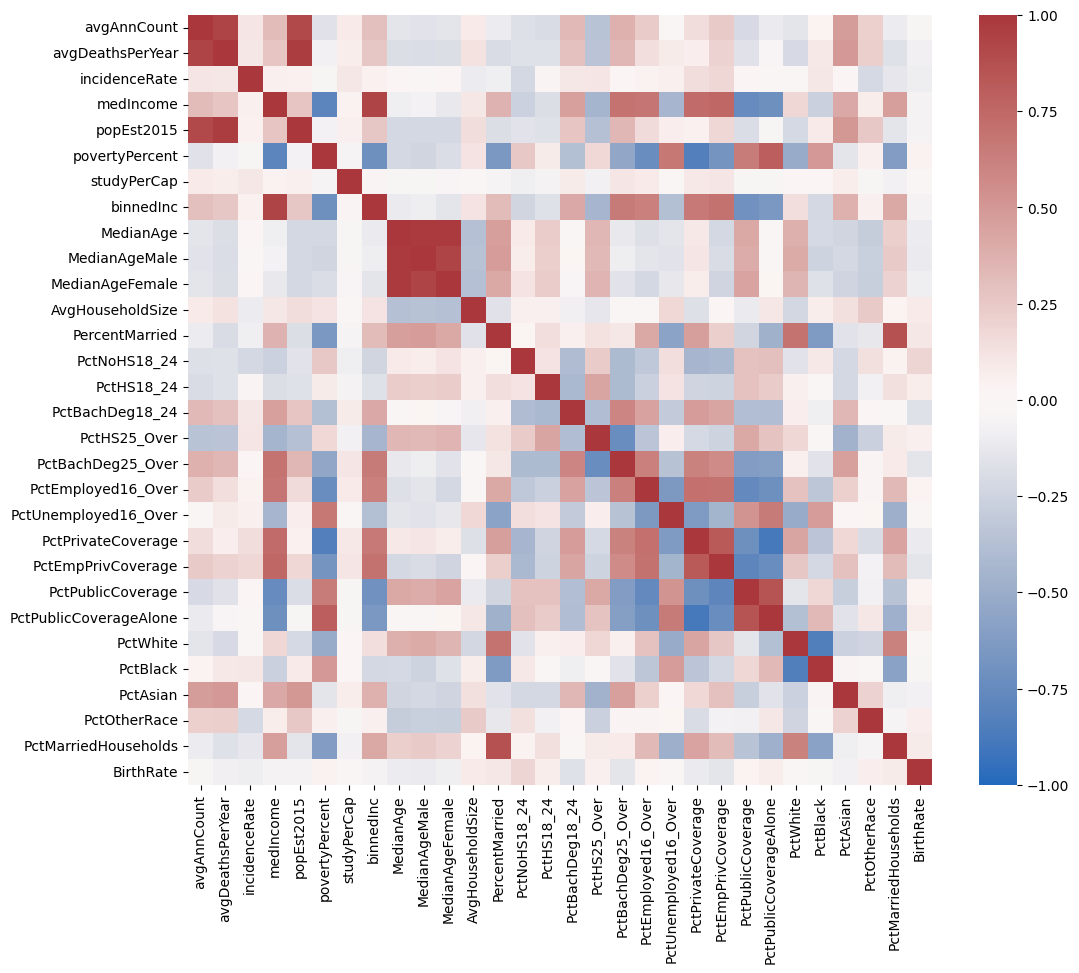

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(x_train.corr(), cmap = 'vlag', vmin = -1, vmax = 1)

Nótese que no todos los factores son independientes. Sin embargo, fue con estos que se produjo el modelo con el mejor ajuste.

### 5.1.3. Linealidad

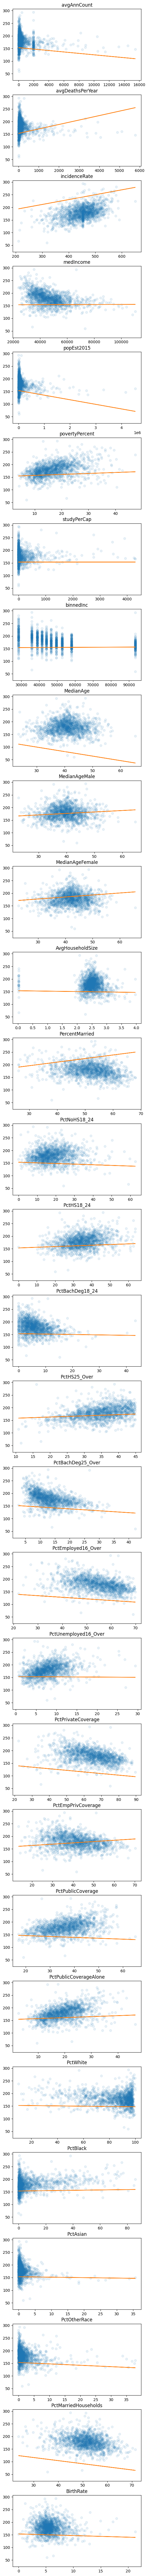

In [ ]:
features = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015',
            'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge', 'MedianAgeMale',
            'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
            'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
            'PctPrivateCoverage','PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite',
            'PctBlack', 'PctAsian','PctOtherRace', 'PctMarriedHouseholds','BirthRate']
f, axs = plt.subplots(len(features), 1, sharey = True, figsize = (6, 4*len(features)))  # Cambio de 1 a len(features)

for i in range(len(features)):
    col = features[i]
    x = x_train_mejor[col]
    m = lr_mejor.coef_[0][i]
    b = lr_mejor.intercept_

    axs[i].plot(x, y_train_mejor, 'o', alpha = 0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

Se evidencia que el modelo cumple con linealidad. A continuación se muestra la relación entre las variables independientes y la variable dependiente es lineal. Como se puede notar, hay una tendencia clara en el diagrama de dispersión, lo que significa que los efectos de las variables independientes sobre la variable dependiente son proporcionales.

### 5.1.4. Normalidad en los errores

In [ ]:
errors = (pipeline.predict(x_train) - y_train).values.ravel()

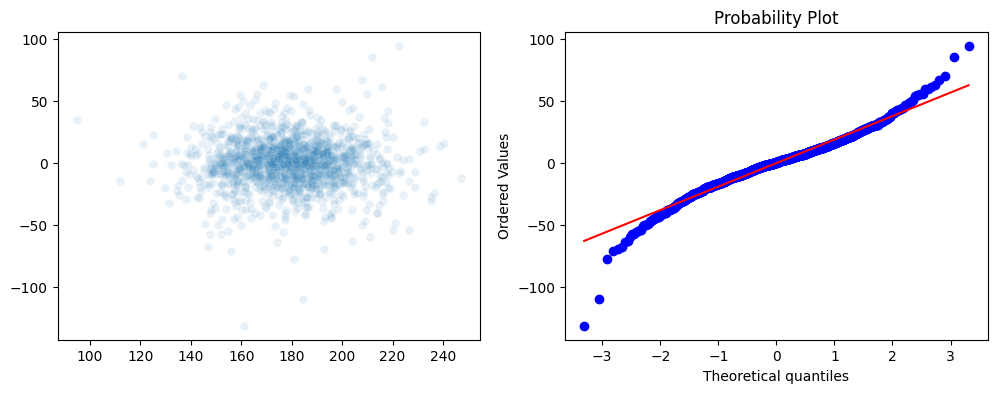

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Dispersión
sns.scatterplot(x = pipeline.predict(x_train).ravel(), y = errors.ravel(), alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors.ravel(), dist = 'norm', plot = axes[1])

El primer gráfico muestra una dispersión relativamente baja, lo cuál es bueno. Adicionalmente, el segundo gráfico muestra una distribución normal. A pesar de que esta no es muy marcada, como se esperaría, sigue siendo lo suficientemente "normal" como para ser válida en este contexto.

### 5.1.5. Homocedasticidad

<Axes: >

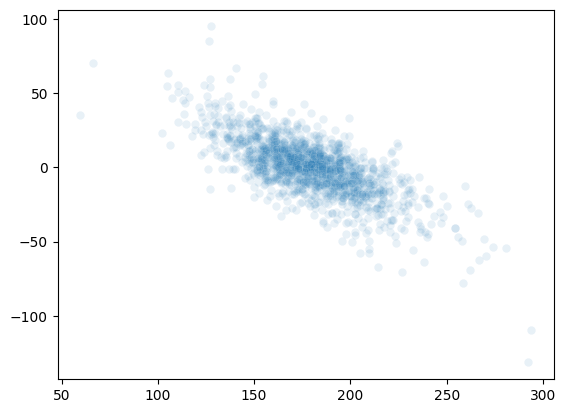

In [ ]:
sns.scatterplot(x = y_train['deathRate'].ravel(), y = errors.ravel(), alpha = 0.1)

## 5.2. Interpretación de los coeficientes

En esta sección se realiza la interpretación de los coeficientes de la regresión, identificando las variables más relevantes para la estimación y como afectan la variable objetivo.

In [ ]:
lr_mejor.intercept_

array([153.30235752])

El intercepto en un modelo de regresión lineal representa el valor estimado de la variable dependiente cuando todas las variables independientes son iguales a cero. Como se puede notar, obtenemos un valor muy cercano a 0. Esto tiene sentido, pues indica que la financiación que se le dará a un cierto condado será baja cuando todas las características son cero, lo cual es deseable.

A continuación se muestra el coeficiente para cada una de las variables.

In [ ]:
features = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015',
            'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge', 'MedianAgeMale',
            'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
            'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
            'PctPrivateCoverage','PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite',
            'PctBlack', 'PctAsian','PctOtherRace', 'PctMarriedHouseholds','BirthRate']
coeficientes = pd.DataFrame({'columns': features, 'coef': lr_mejor.coef_[0]})

Los coeficientes indican la relación entre cada variable independiente y la variable dependiente, manteniendo constantes las demás variables en el modelo. Un coeficiente positivo indica una relación positiva entre la variable independiente y la variable dependiente, lo que significa que un aumento en la variable independiente se asocia con un aumento en la variable dependiente. Por otro lado, un coeficiente negativo indica una relación negativa, lo que significa que un aumento en la variable independiente se asocia con una disminución en la variable dependiente. Un valor más grande de coeficiente en valor absoluto sugiere que esa variable tiene un efecto relativamente más grande en la variable dependiente en comparación con otras variables en el modelo.

# 6. Visualización de los resultados

TABLERO DE CONTROL EN BI

# 8. Predicción datos de prueba no etiquetados

In [ ]:
#Cargar archivo de validacion
#Importar datos para entrenamiento
data_val = pd.read_csv('./202410_Laboratorio 2 - Regresión_val_data.csv')

loded_pipeline = load('Modelo.joblib')
y_pred = loded_pipeline.predict(data_val)

#Añadir predicciones al dataframe
data_val['deathRate'] = y_pred

"""
  Datos a exportar
  - DataFrame de predicciones
  - Coeficientes del mejor modelo
"""
data_val.to_csv('validacion_pred.csv', sep=";", decimal=",")
coeficientes.to_csv('coeficientes_mejor_regresion.csv', sep=";", decimal=",")